The below notebook explores the `data/synthetic_fraud_dataset.csv` file and creates new features based on the findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Setting the default size and dpi level of the plot
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 250

# Setting the default size of the plot title and axis labels
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12

# Setting the default weight of the plot title and axis labels
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["axes.labelweight"] = 'bold'

# To show all columns
pd.set_option("display.max_columns", None)

In [4]:
# Reading data from the file: 'synthetic_fraud_dataset.csv'
df = pd.read_csv("../data/synthetic_fraud_dataset.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


Below we rename the columns to lower_case_snake_format; we could have written a script to do this, but instead we code this manually.

In [5]:
# Renaming columns
df.columns = [
    'transaction_id', 'user_id', 'transaction_amount', 'transaction_method', 'transaction_timestamp', 'account_balance', 
    'device_type', 'transaction_location', 'merchant_category', 'ip_address_flag', 'previous_fraudulent_activities', 
    'daily_transaction_count', 'avg_transaction_amount_7d', 'failed_transaction_count_7d', 'card_type', 'card_age_months', 
    'transaction_distance', 'authentication_method', 'fraud_risk_score', 'is_weekend', 'fraud_label'
]

In [6]:
# Checking the statistics of each numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_amount,50000.0,99.411012,98.687292,0.0000,28.6775,69.66000,138.852500,1174.14
account_balance,50000.0,50294.065981,28760.458557,500.4800,25355.9950,50384.43000,75115.135000,99998.31
ip_address_flag,50000.0,0.050200,0.218360,0.0000,0.0000,0.00000,0.000000,1.00
previous_fraudulent_activities,50000.0,0.098400,0.297858,0.0000,0.0000,0.00000,0.000000,1.00
daily_transaction_count,50000.0,7.485240,4.039637,1.0000,4.0000,7.00000,11.000000,14.00
avg_transaction_amount_7d,50000.0,255.271924,141.382279,10.0000,132.0875,256.08500,378.032500,500.00
failed_transaction_count_7d,50000.0,2.003540,1.414273,0.0000,1.0000,2.00000,3.000000,4.00
card_age_months,50000.0,119.999940,68.985817,1.0000,60.0000,120.00000,180.000000,239.00
transaction_distance,50000.0,2499.164155,1442.013834,0.2500,1256.4975,2490.78500,3746.395000,4999.93
fraud_risk_score,50000.0,0.501556,0.287774,0.0001,0.2540,0.50225,0.749525,1.00


The above function describes the data, and we can see the statistical breakdown of each column and feature. It shows that all features have the same count.

In [7]:
# Checking the statistics of each categorical columns
df.describe(include='object').T

,count,unique,top,freq
transaction_id,50000,50000,TXN_33553,1
user_id,50000,8963,USER_6599,16
transaction_method,50000,4,POS,12549
transaction_timestamp,50000,47724,2023-06-04 06:35:00,4
device_type,50000,3,Tablet,16779
transaction_location,50000,5,Tokyo,10208
merchant_category,50000,5,Clothing,10033
card_type,50000,4,Mastercard,12693
authentication_method,50000,4,Biometric,12591


The above looks at the categorical features. We can see that transaction_id must be unique as the top most frequent value has a count of 1 and a unique count of 50000. For user_id we can see that the most transactions a user has is 16. It also shows we have information about the device type, where there are 3 different unique values, location, five different locations and more.

In [8]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  50000 non-null  object 
 1   user_id                         50000 non-null  object 
 2   transaction_amount              50000 non-null  float64
 3   transaction_method              50000 non-null  object 
 4   transaction_timestamp           50000 non-null  object 
 5   account_balance                 50000 non-null  float64
 6   device_type                     50000 non-null  object 
 7   transaction_location            50000 non-null  object 
 8   merchant_category               50000 non-null  object 
 9   ip_address_flag                 50000 non-null  int64  
 10  previous_fraudulent_activities  50000 non-null  int64  
 11  daily_transaction_count         50000 non-null  int64  
 12  avg_transaction_amount_7d       

In [9]:
# Checking the number of null values in each column
df.isnull().sum()

transaction_id                    0
user_id                           0
transaction_amount                0
transaction_method                0
transaction_timestamp             0
account_balance                   0
device_type                       0
transaction_location              0
merchant_category                 0
ip_address_flag                   0
previous_fraudulent_activities    0
daily_transaction_count           0
avg_transaction_amount_7d         0
failed_transaction_count_7d       0
card_type                         0
card_age_months                   0
transaction_distance              0
authentication_method             0
fraud_risk_score                  0
is_weekend                        0
fraud_label                       0
dtype: int64

There are no null values in the features.

In [10]:
# Checking the number of duplicate rows
df.duplicated().sum()

np.int64(0)

There are no duplicate rows in the dataset either.

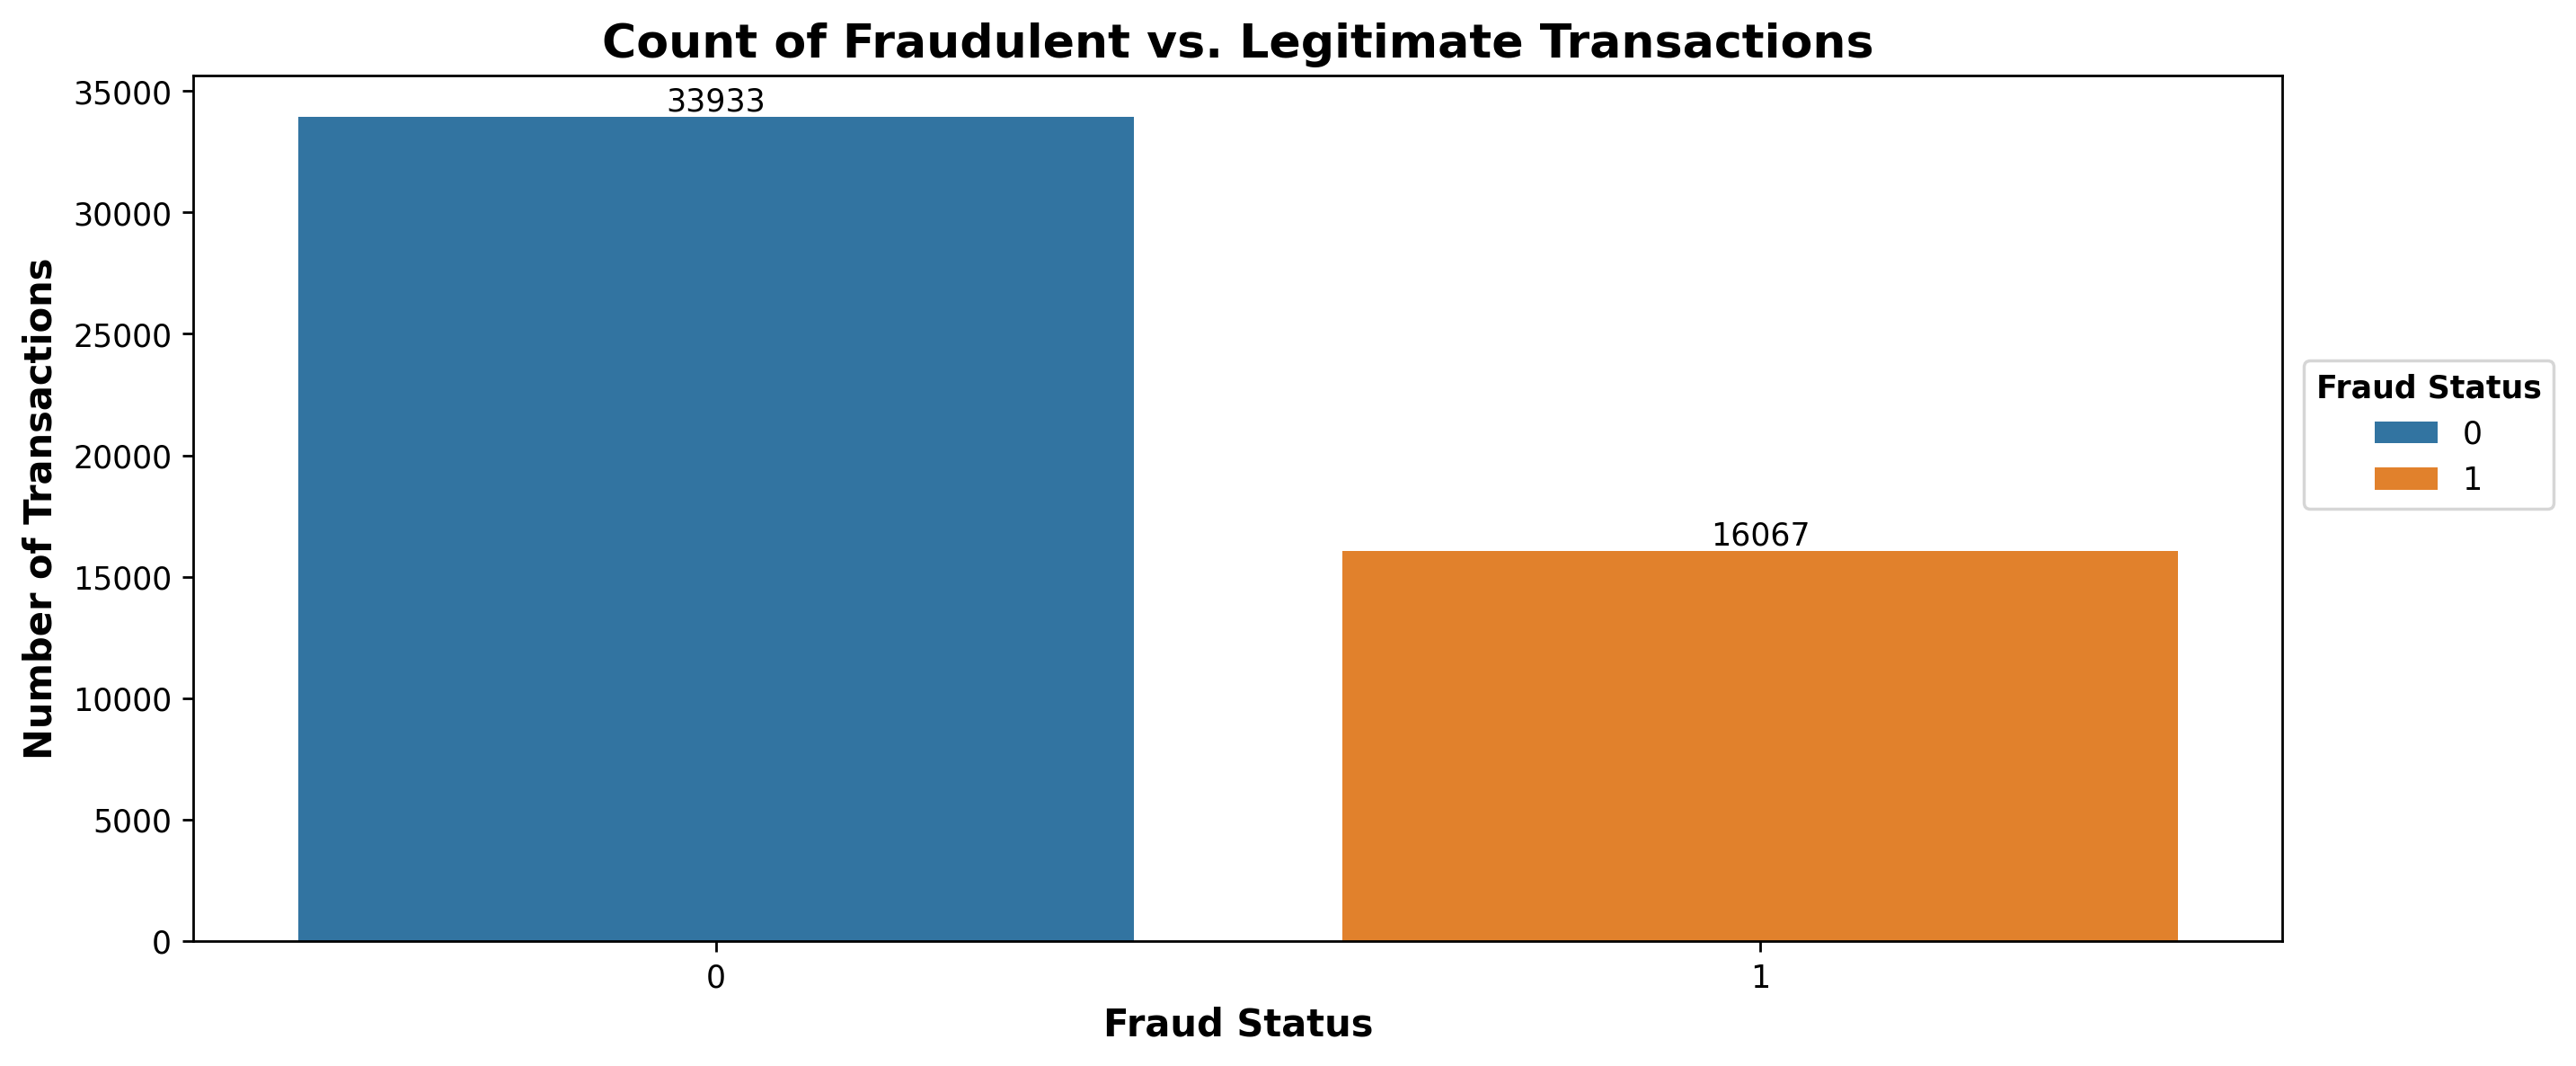

In [61]:
# Checking the number of fraudulent transactions compared to genuine ones
ax = sns.countplot(
    data = df,
    x = "fraud_label",
    hue = "fraud_label"
)

ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

# Adding title and labels to the plot
plt.title("Count of Fraudulent vs. Legitimate Transactions")
plt.xlabel("Fraud Status")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

As shown, there are more legitimate transactions than fradulent.

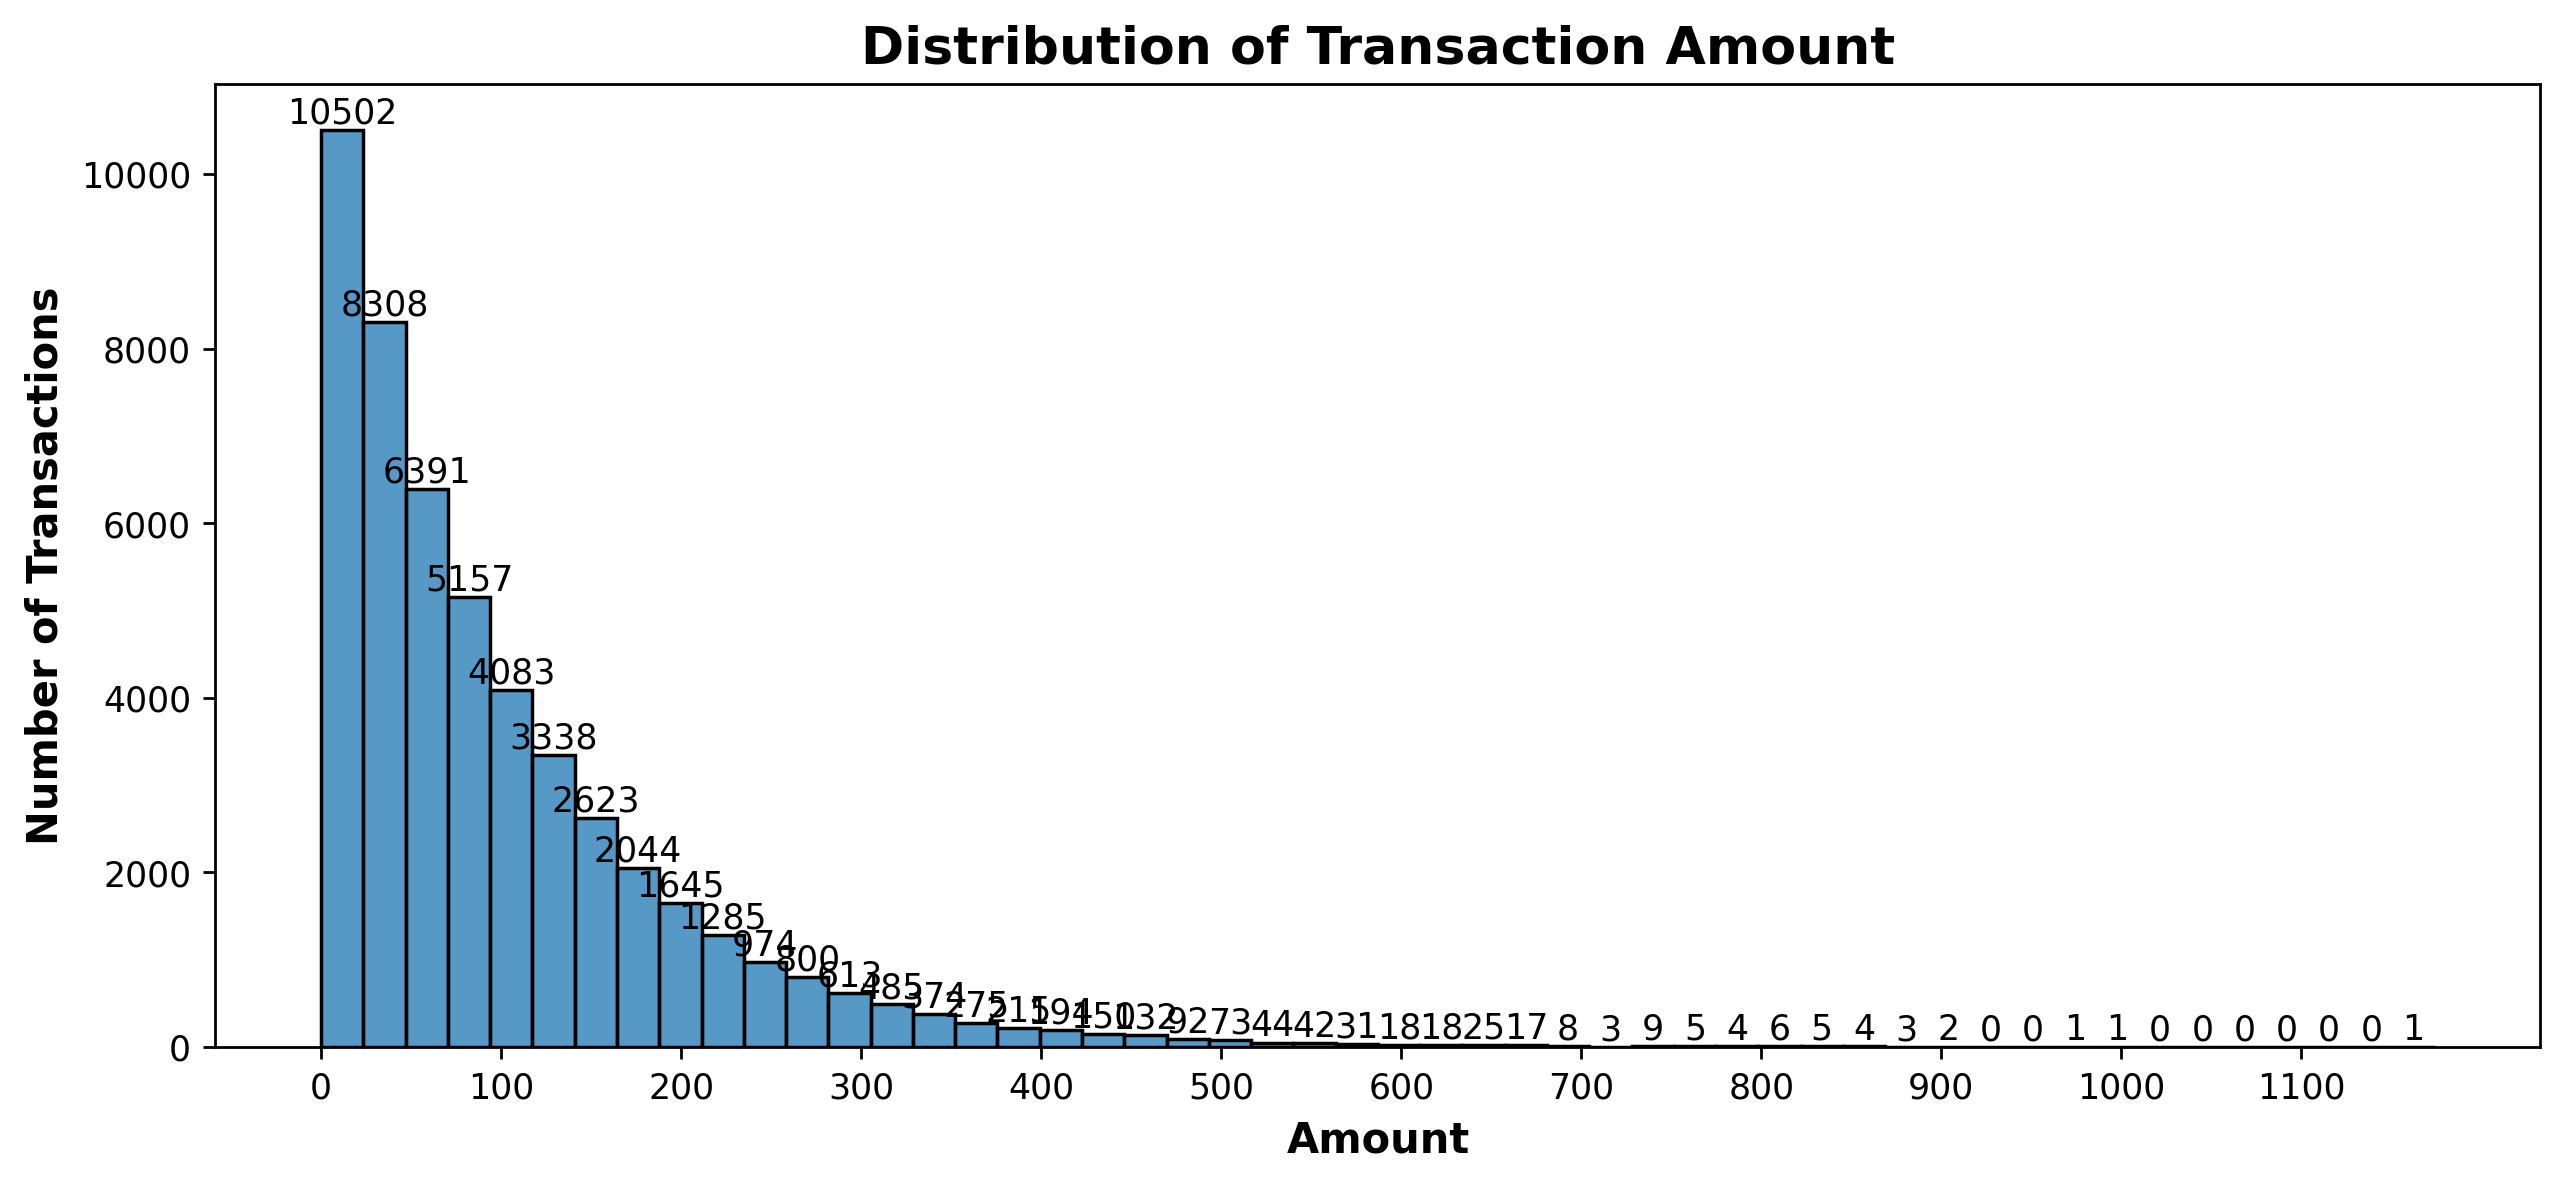

In [58]:
# Checking the distribution of transaction amount
ax = sns.histplot(
    data = df,
    x = "transaction_amount",
    bins = 50
)

ax.bar_label(ax.containers[0], label_type='edge')

# Adding title and labels to the plot
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Number of Transactions")

# Changing the Xtick values
min_value = int(df['transaction_amount'].min())
max_value = int(df['transaction_amount'].max())
plt.xticks(range(min_value, max_value, 100));

More transactions for smaller amounts than larger amounts.

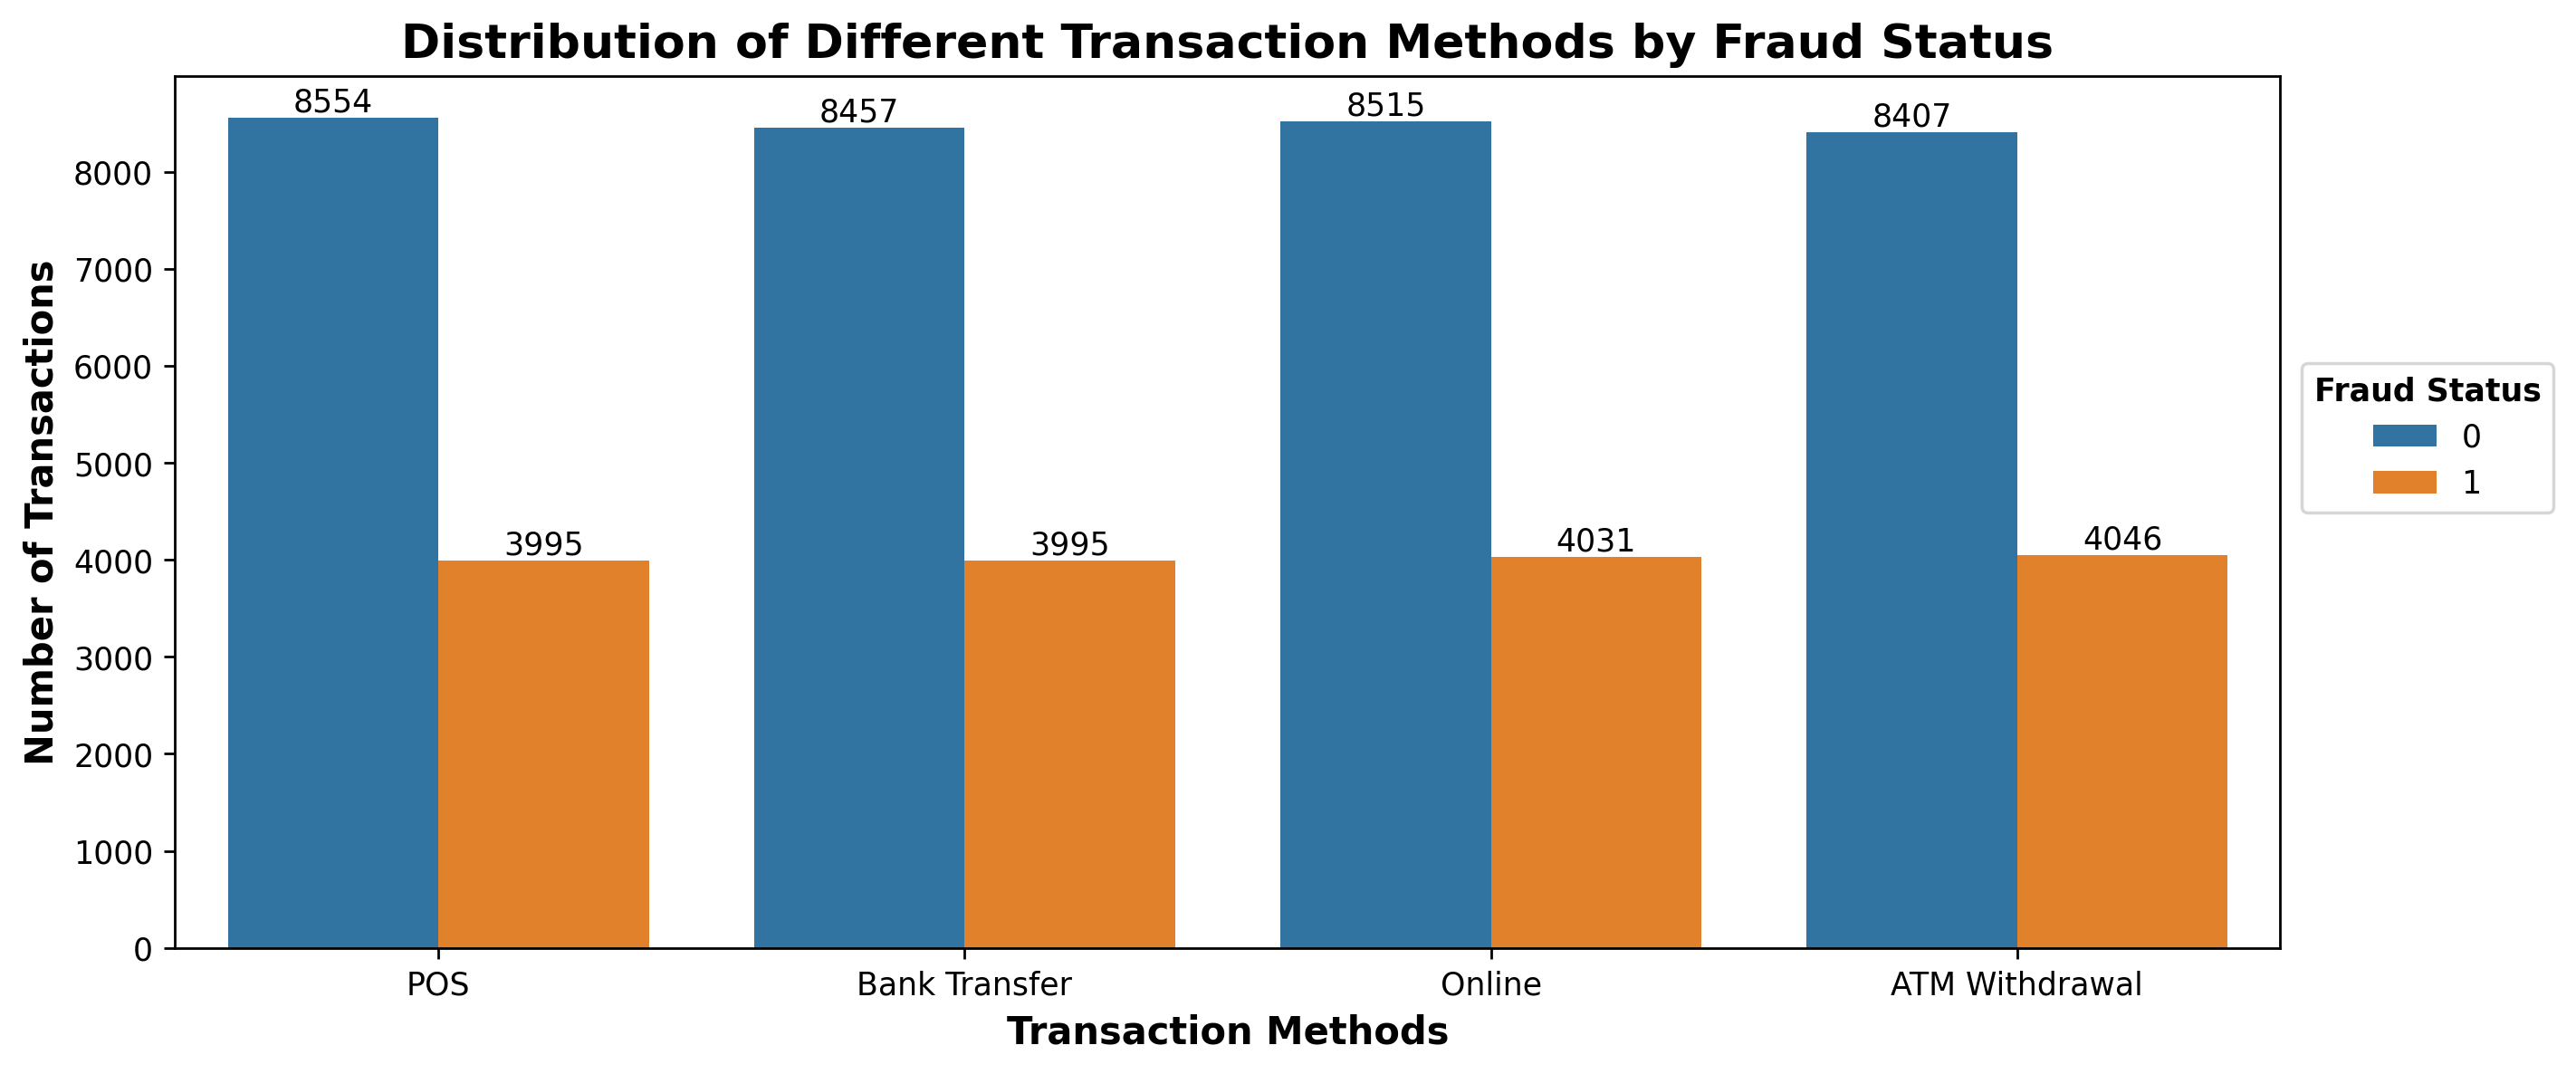

In [ ]:
# Checking the distribution of different transaction methods by fraud status
ax = sns.countplot(
    data = df,
    x = "transaction_method",
    hue = "fraud_label"
)

ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

# Adding title and labels to the plot
plt.title("Distribution of Different Transaction Methods by Fraud Status")
plt.xlabel("Transaction Methods")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

Quite the balanced dataset!

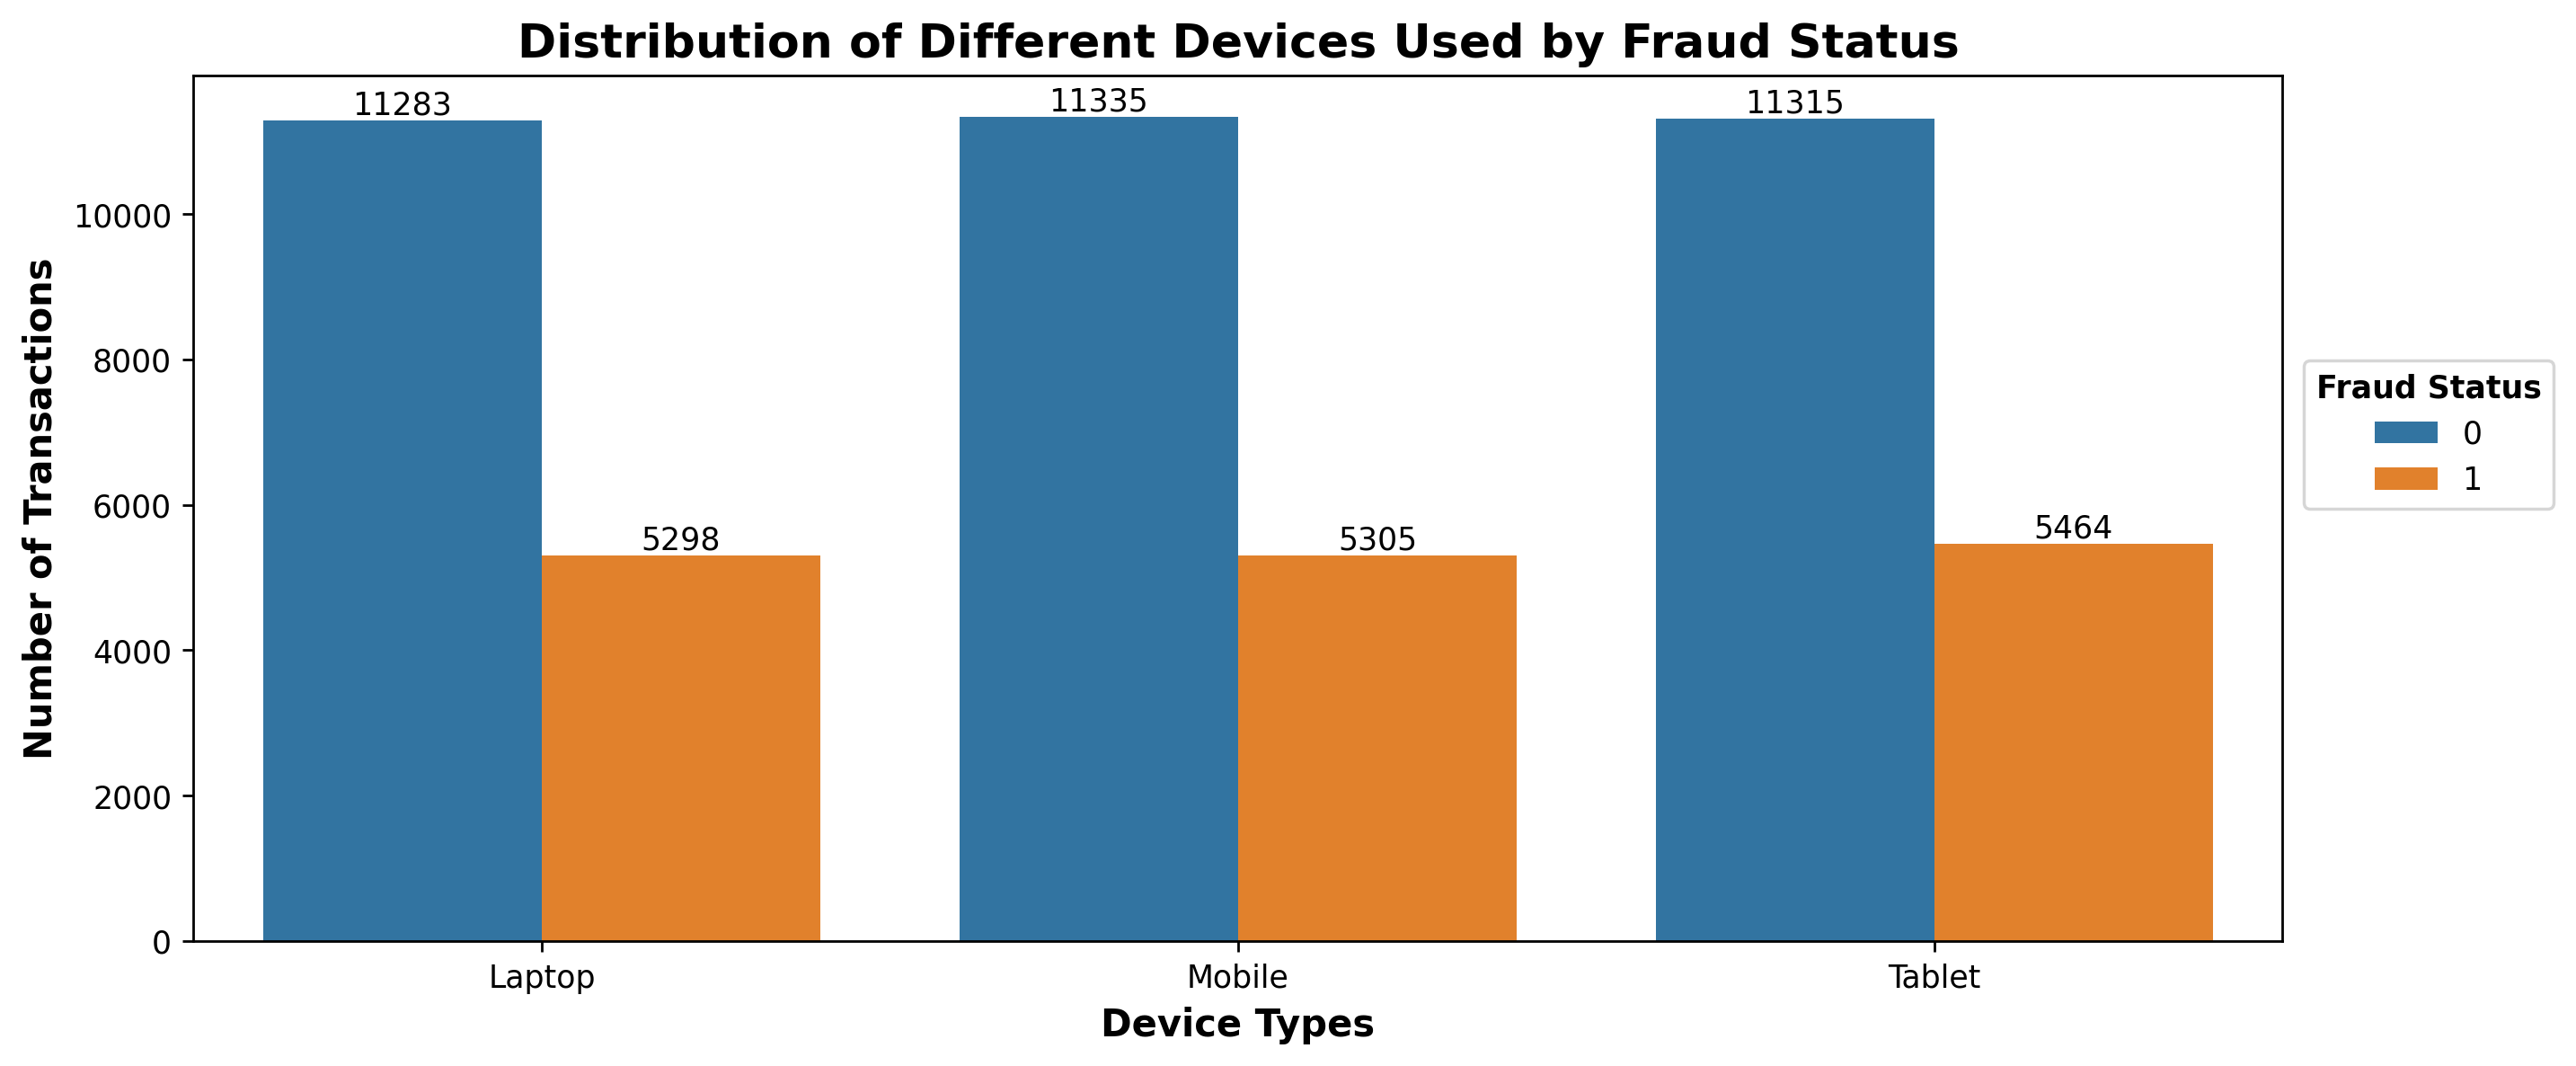

In [62]:
# Checking the distribution of device types by fraud status
ax = sns.countplot(
    data = df,
    x = "device_type",
    hue = "fraud_label"
)

ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

# Adding title and labels to the plot
plt.title("Distribution of Different Devices Used by Fraud Status")
plt.xlabel("Device Types")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

In [37]:
df['transaction_timestamp']

0        2023-08-14 19:30:00
1        2023-06-07 04:01:00
2        2023-06-20 15:25:00
3        2023-12-07 00:31:00
4        2023-11-11 23:44:00
                ...         
49995    2023-01-29 18:38:00
49996    2023-05-09 08:55:00
49997    2023-01-30 19:32:00
49998    2023-03-09 19:47:00
49999    2023-08-19 23:57:00
Name: transaction_timestamp, Length: 50000, dtype: object

As you see the timestamp information is in object format, to make iut easier, let's convert to pandas timestamp format

In [38]:
# Converting transaction timestamp column to pandas datetime object
df['transaction_timestamp'] = pd.to_datetime(df['transaction_timestamp'])
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,transaction_timestamp,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


Now we can extract things like the day of the week, the minute, the hour, the day of the month, the month of the year etc

In [39]:
# Adding a new column to show the day of the week when each transaction was made
df['day_of_week'] = df['transaction_timestamp'].dt.day_name()
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,transaction_timestamp,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday


In [40]:
# Adding a new column to show the minute of each transaction
df['transaction_min'] = df['transaction_timestamp'].dt.minute
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,transaction_timestamp,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week,transaction_min
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday,30
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday,25
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday,31
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday,44


In [41]:
# Adding a new column to show the hour of each transaction
df['transaction_hour'] = df['transaction_timestamp'].dt.hour
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,transaction_timestamp,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week,transaction_min,transaction_hour
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday,30,19
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday,1,4
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday,25,15
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday,31,0
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday,44,23


In [42]:
# Adding a new column to show the day of each transaction
df['transaction_date'] = df['transaction_timestamp'].dt.day
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,transaction_timestamp,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week,transaction_min,transaction_hour,transaction_date
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday,30,19,14
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday,1,4,7
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday,25,15,20
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday,31,0,7
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday,44,23,11


In [43]:
# Adding a new column to show the month of each transaction
df['transaction_month'] = df['transaction_timestamp'].dt.month
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,transaction_timestamp,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday,30,19,14,8
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday,1,4,7,6
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday,25,15,20,6
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday,31,0,7,12
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday,44,23,11,11


We no longer need the original feature, so lets drop it.

In [44]:
# Dropping transaction timestamp column
df = df.drop("transaction_timestamp", axis = 1)
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday,30,19,14,8
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday,1,4,7,6
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday,25,15,20,6
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday,31,0,7,12
4,TXN_39489,USER_2014,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday,44,23,11,11


Text(0, 0.5, 'Number of Transactions')

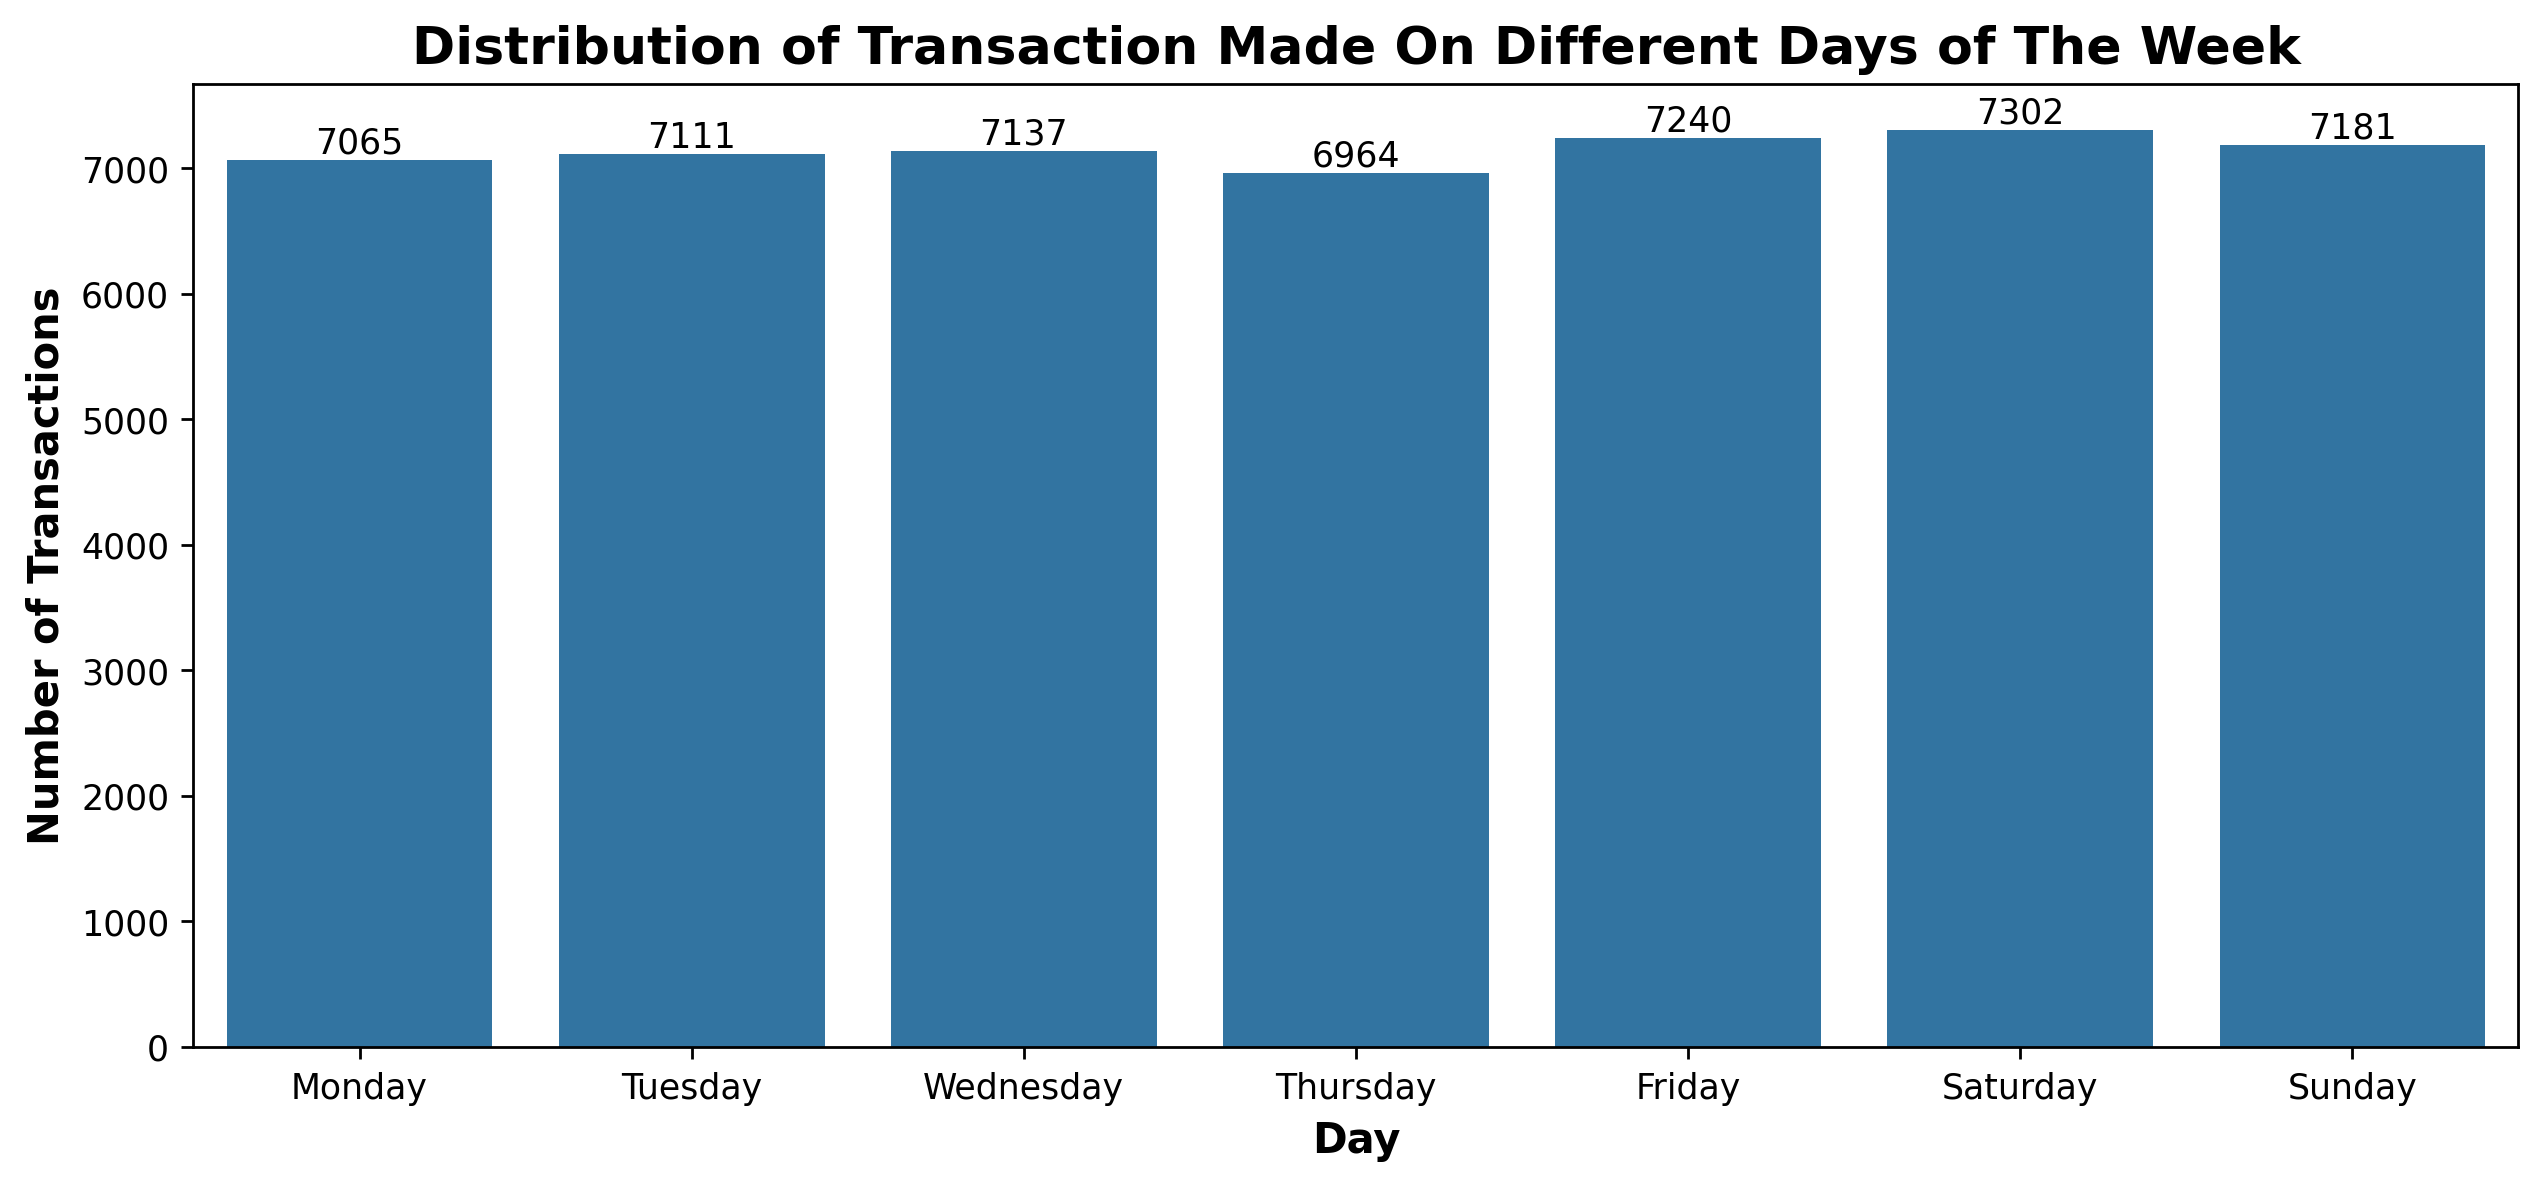

In [50]:
# Checking the distribution of transactions made on different days of the week
ax = sns.countplot(
    data = df,
    x = "day_of_week",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

ax.bar_label(ax.containers[0], label_type='edge')

# Adding title and labels to the plot
plt.title("Distribution of Transaction Made On Different Days of The Week")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")


Shows a drop in transactions made on Wednesday.

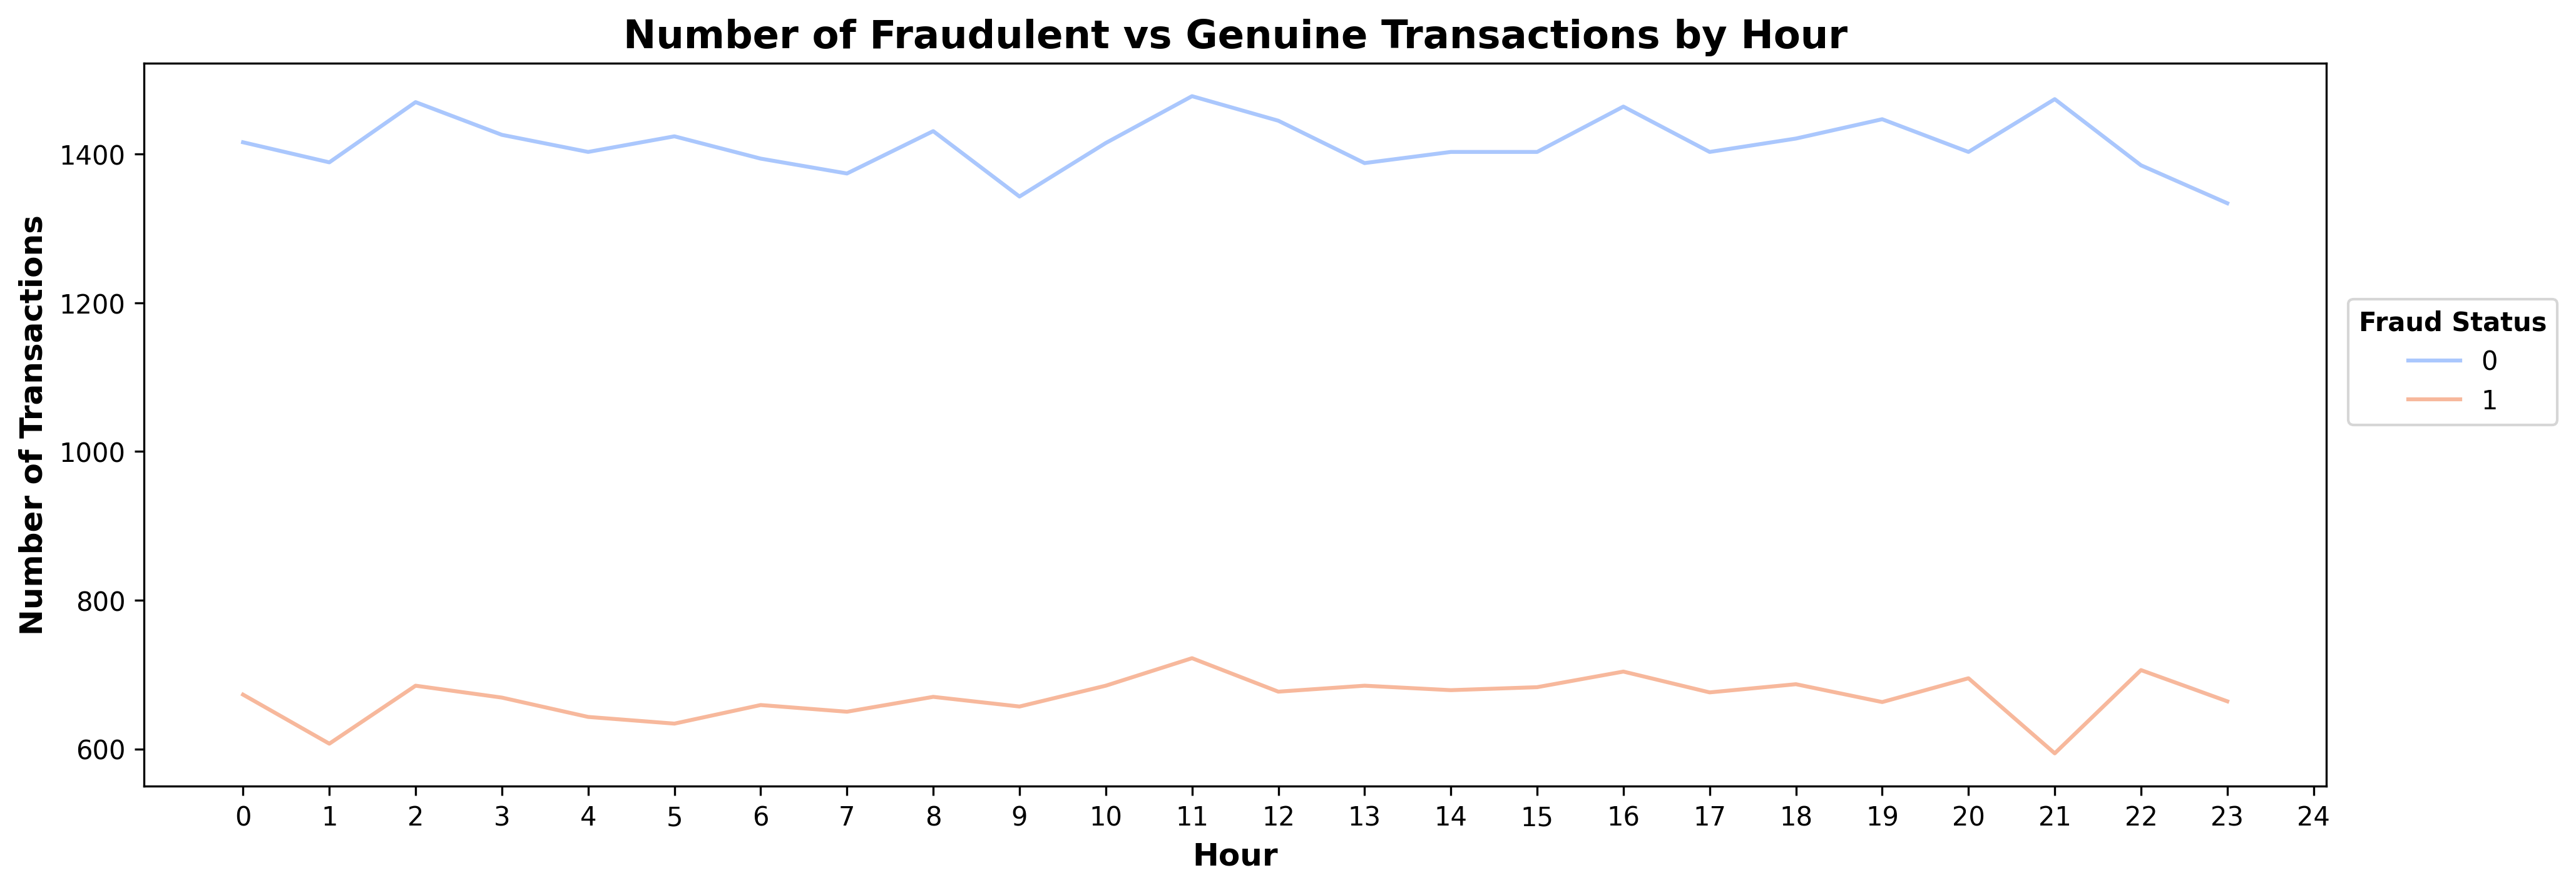

In [ ]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how many fraudulent vs genuine transactions were made each hour
sns.lineplot(
    data = df.groupby(["transaction_hour", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_hour",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(0, 25))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

Shows some peaks and troughs but no major signals here.

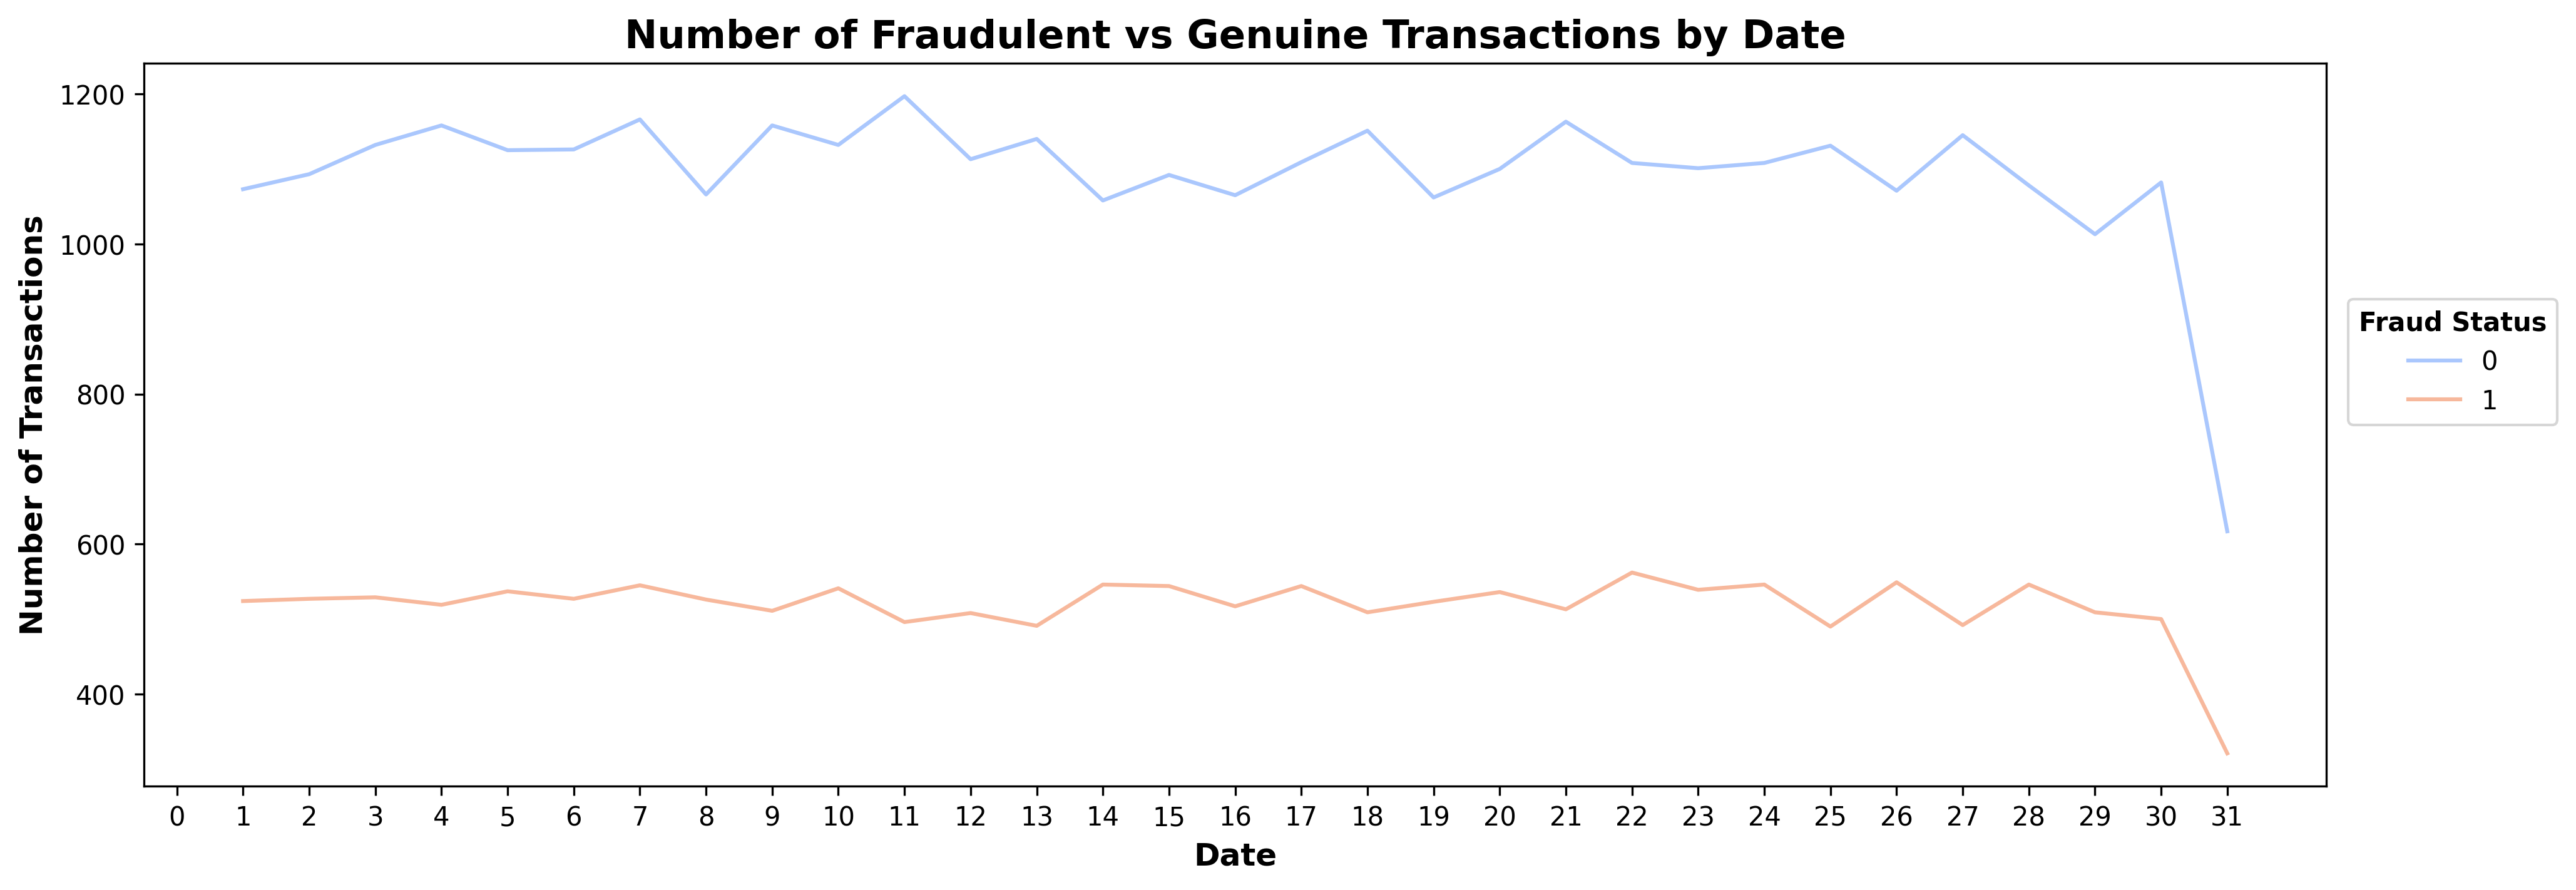

In [65]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how many fraudulent vs genuine transactions were made each date
sns.lineplot(
    data = df.groupby(["transaction_date", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_date",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Date")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(0, 32))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

The drop off at 31 is because not all months have 31 days!

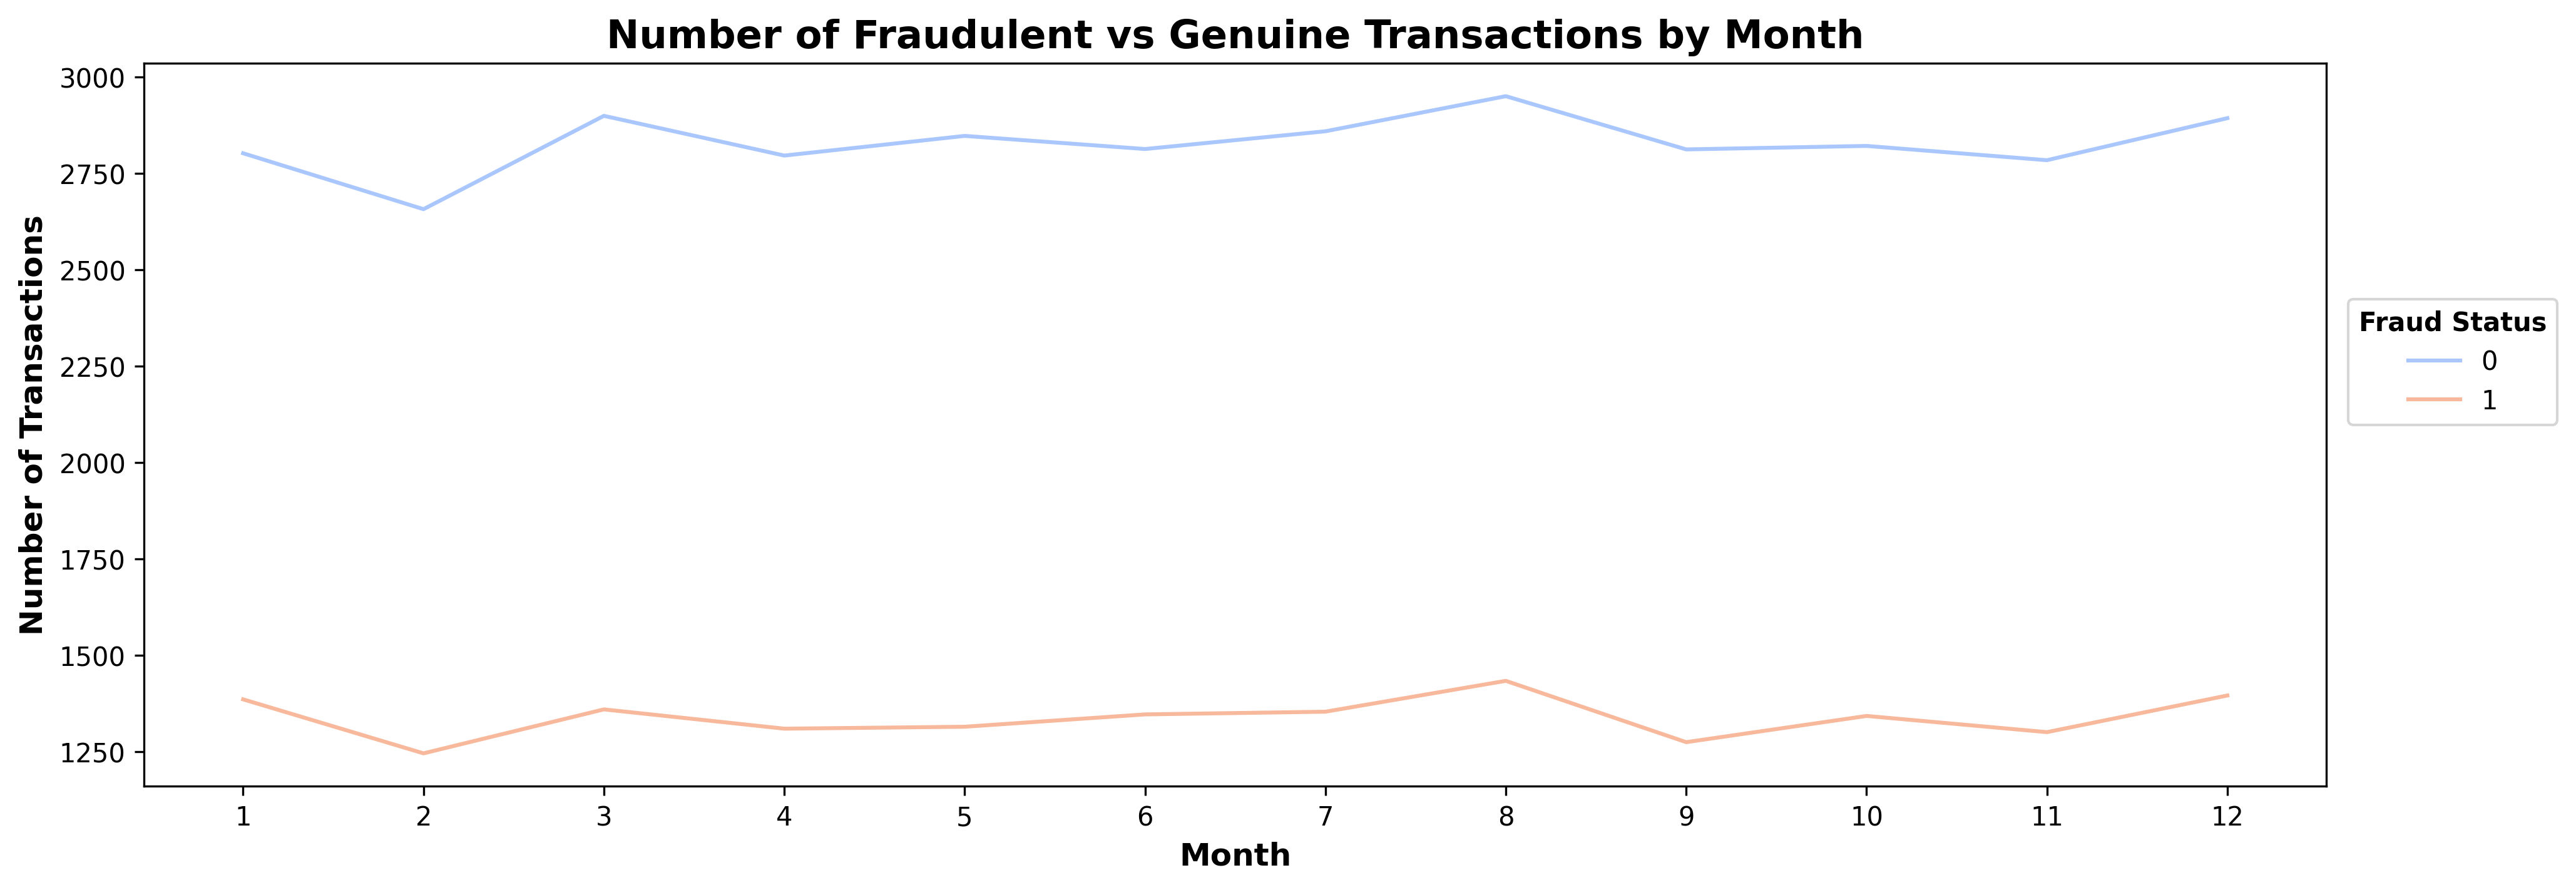

In [30]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how many fraudulent vs genuine transactions were made each month
sns.lineplot(
    data = df.groupby(["transaction_month", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_month",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(1, 13))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

Again, February has the fewest days.

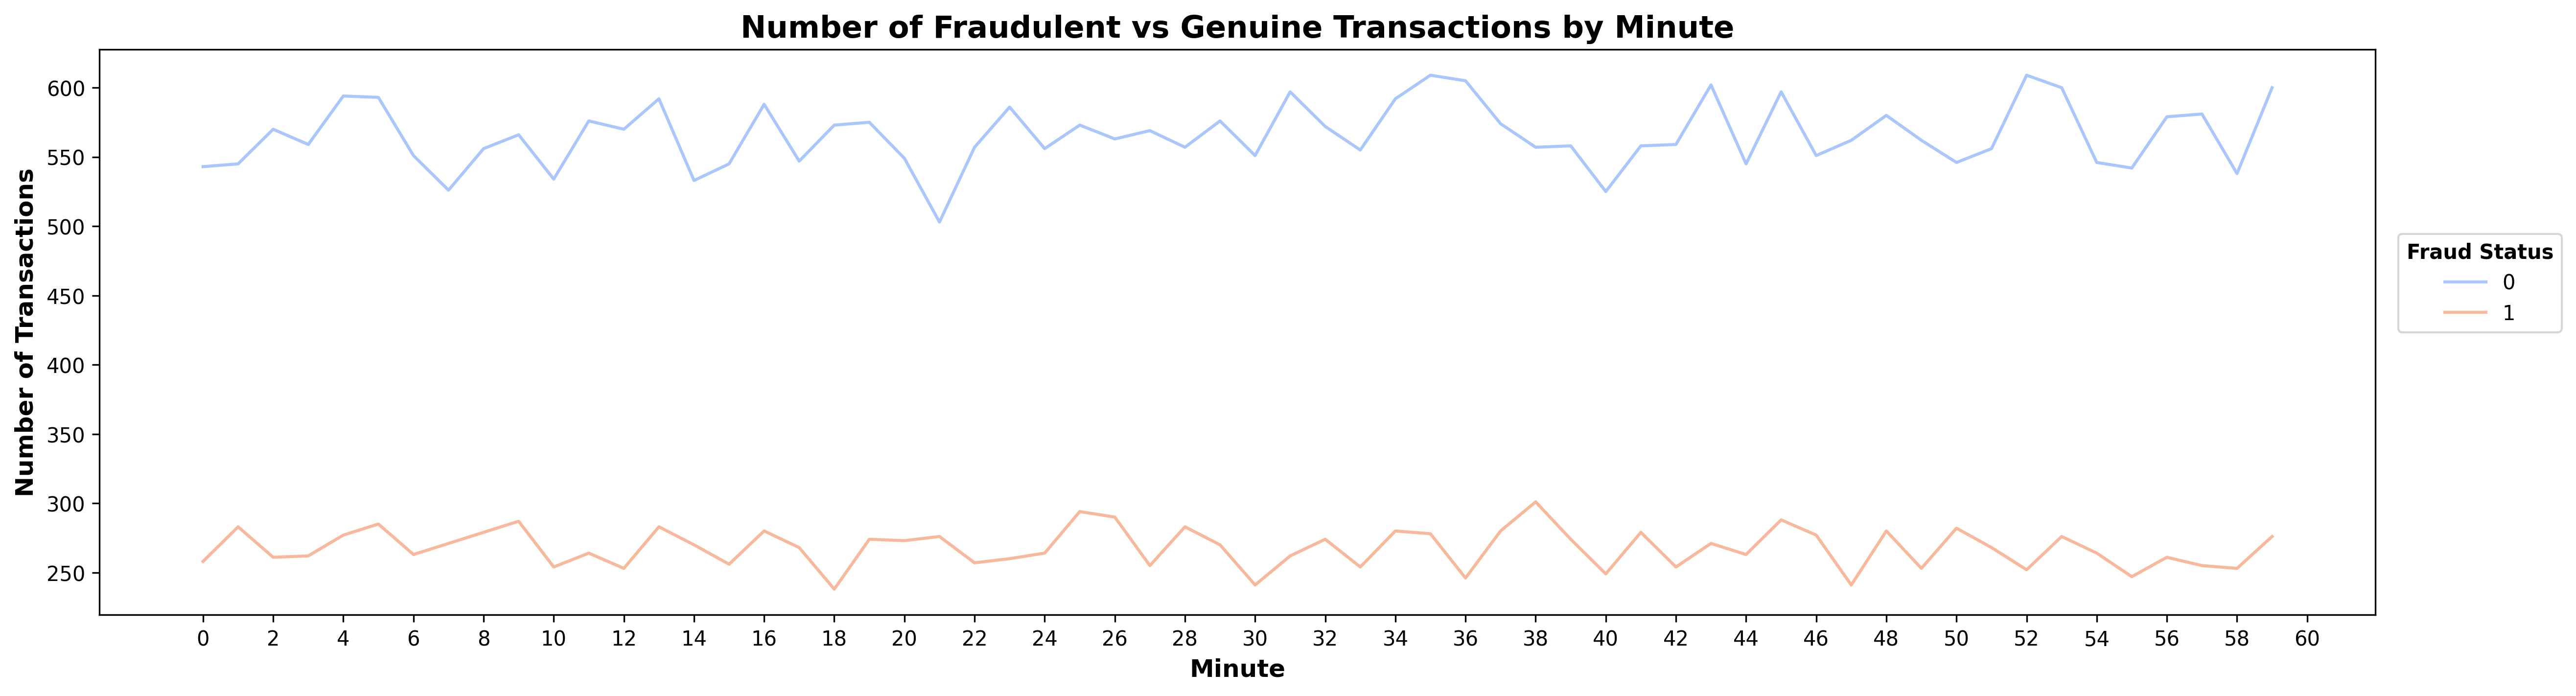

In [31]:
# Setting plot size
plt.figure(figsize = (20, 5), dpi = 300)

# Checking how many transactions were made each min
sns.lineplot(
    data = df.groupby(["transaction_min", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_min",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Minute")
plt.xlabel("Minute")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(0, 61, 2))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

In [69]:
# Filtering out the fradulent transactions and groupping them by day of the month
fraud_df_month = df.groupby("transaction_date", as_index=False)["fraud_label"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Calculate the fraud rate
fraud_df_month["fraud_rate"] = fraud_df_month["fraudulent_transaction_count"] / fraud_df_month["total_transaction_count"]
fraud_df_month.sort_values('fraud_rate', ascending=False)

,transaction_date,fraudulent_transaction_count,total_transaction_count,fraud_rate
30,31,321,938,0.342217
13,14,546,1604,0.340399
25,26,549,1620,0.338889
21,22,562,1670,0.336527
27,28,546,1624,0.336207
28,29,509,1522,0.334428
14,15,544,1636,0.332518
7,8,526,1592,0.330402
23,24,546,1654,0.330109
18,19,523,1585,0.329968


The 31st has the highest fraud rate (fradulent transaction count / total transaction count). The 11th has the least.

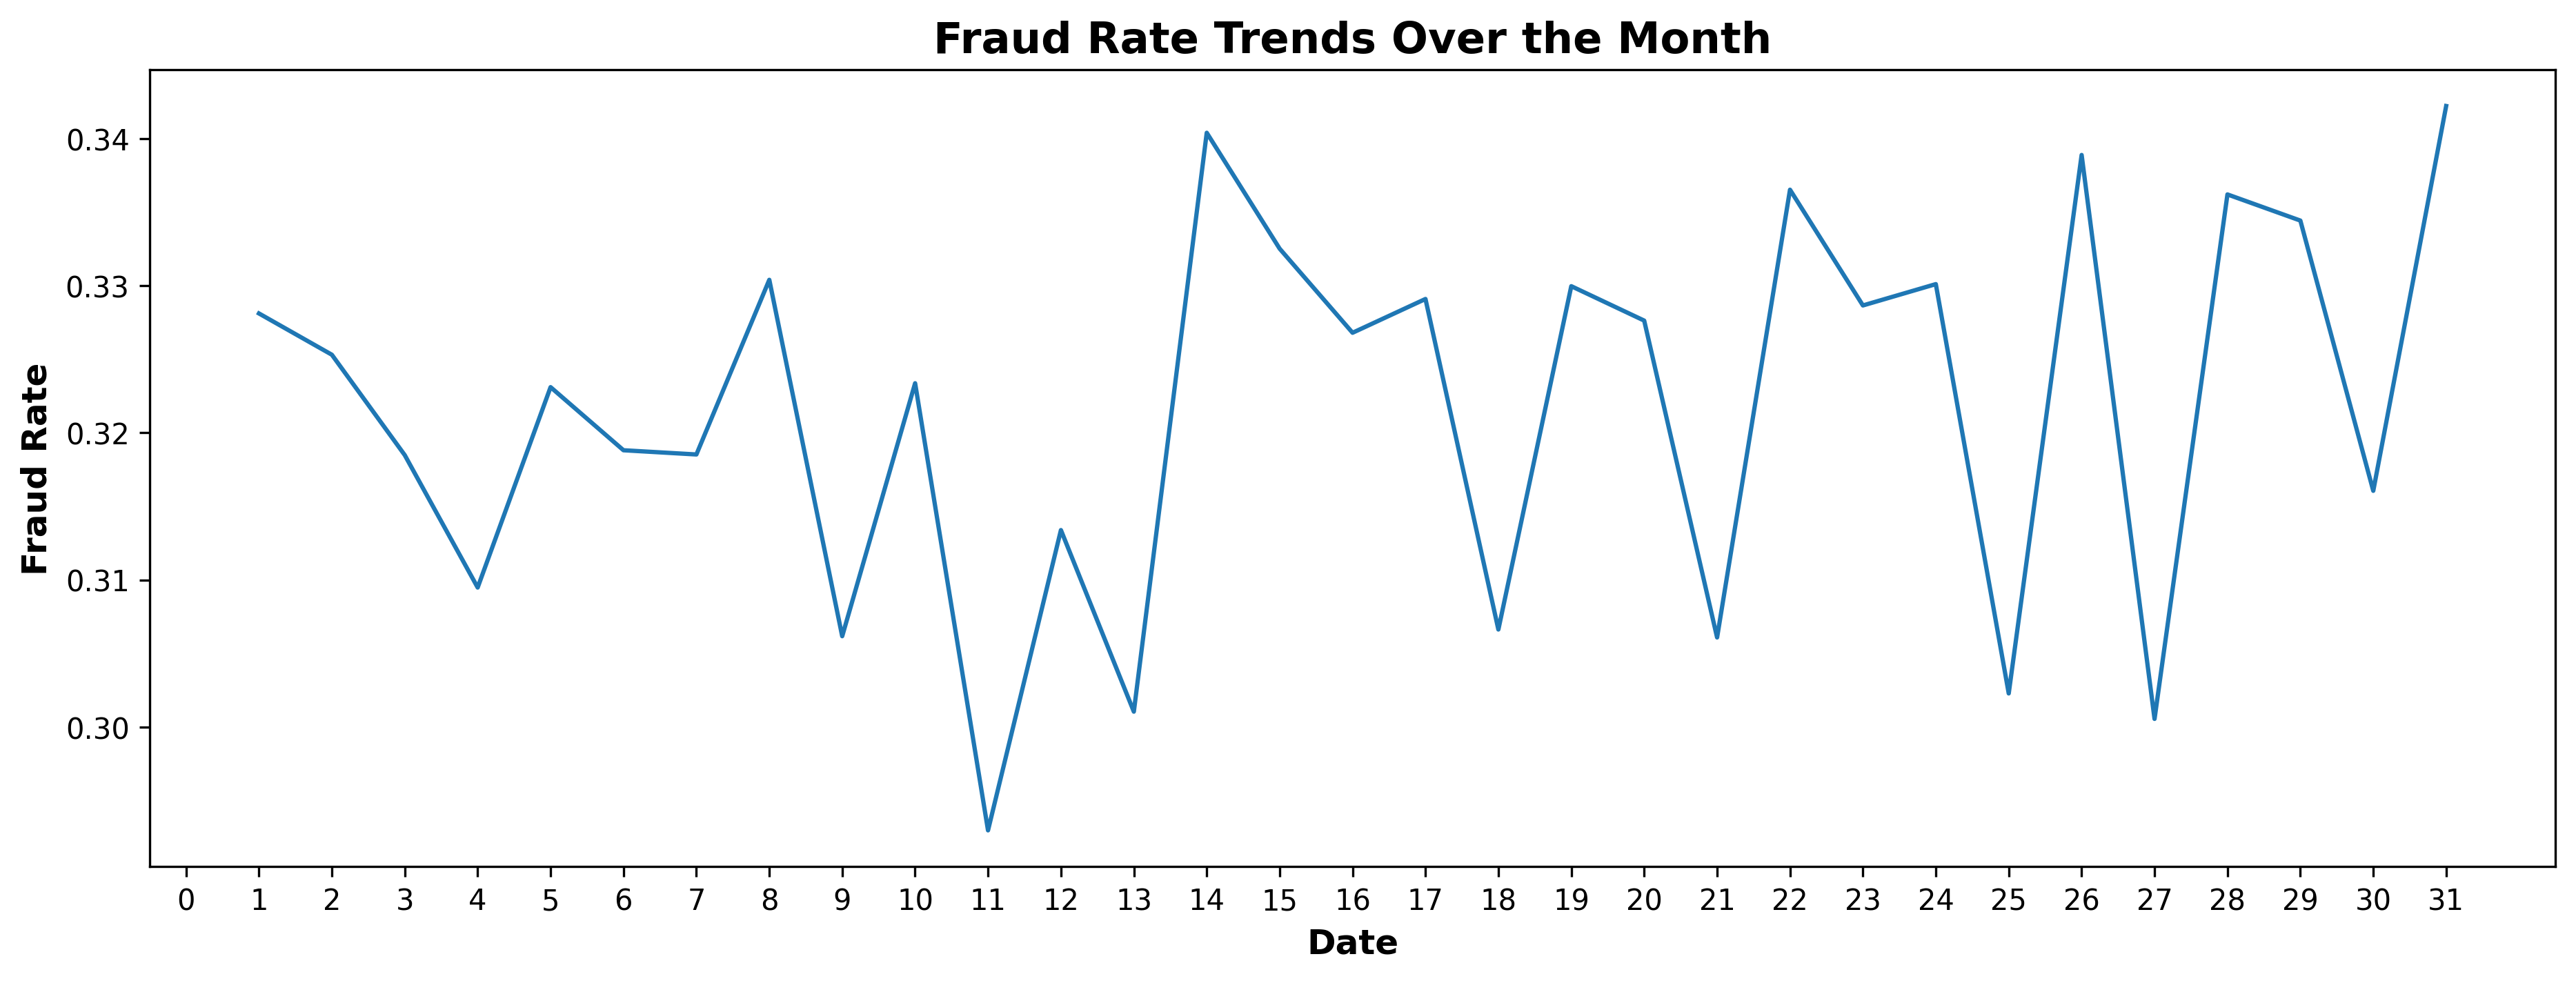

In [70]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how the fraud rate changes throughout the month
sns.lineplot(
    data = fraud_df_month,
    x = "transaction_date",
    y = "fraud_rate",
)

# Adding title and labels to the plot
plt.title("Fraud Rate Trends Over the Month")
plt.xlabel("Date")
plt.ylabel("Fraud Rate")

# Changing xtick values
plt.xticks(range(0, 32));

Fraud rate fluctuates over the month, but all within around 0.04. It does appear to trend slightly upward though over the month.

In [71]:
# Filtering out the fradulent transactions and groupping them by hour of the day
fraud_df_hour = df.groupby("transaction_hour", as_index=False)["fraud_label"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Calculate the fraud rate
fraud_df_hour["fraud_rate"] = fraud_df_hour["fraudulent_transaction_count"] / fraud_df_hour["total_transaction_count"]
fraud_df_hour.sort_values('fraud_rate', ascending=False)

,transaction_hour,fraudulent_transaction_count,total_transaction_count,fraud_rate
22,22,706,2091,0.337637
23,23,664,1998,0.332332
20,20,695,2098,0.331268
13,13,685,2073,0.330439
9,9,657,2000,0.328500
11,11,722,2200,0.328182
15,15,683,2086,0.327421
10,10,685,2100,0.326190
14,14,679,2082,0.326129
18,18,687,2108,0.325901


Between 20 and 23 minutes has the highest fraid rate, interestingly.

Lets look at seeing transaction amount as a factor of account balance. Do those with larger accounts make larger transactions?

In [82]:
# Calculating a ratio between transaction amount and account balance
df["transaction_amount_to_balance_ratio"] = df["transaction_amount"] / df["account_balance"]
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month,high_value_transaction,transaction_amount_to_balance_ratio
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday,30,19,14,8,False,0.000427
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday,1,4,7,6,False,0.000016
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday,25,15,20,6,False,0.018226
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday,31,0,7,12,True,0.003311
4,TXN_39489,USER_2014,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday,44,23,11,11,False,0.000339


Ok, so now let's create a new feature called `high_value_transaction` which is when the transaction is over a certain value. At first I used the 75th quantile for this, but then in the future the dataset may shift, so I thought it would be best to have a static value. I've based this on the 7th quantile though which was around 140.

In [74]:
threshold = df['transaction_amount'].quantile(q=0.75)
threshold

np.float64(138.8525)

In [83]:
# Create a new column to classify transactions as high-value or not based on original 75th Quantile value
df['high_value_transaction'] = df['transaction_amount'] > 140
df.head()

,transaction_id,user_id,transaction_amount,transaction_method,account_balance,device_type,transaction_location,merchant_category,ip_address_flag,previous_fraudulent_activities,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age_months,transaction_distance,authentication_method,fraud_risk_score,is_weekend,fraud_label,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month,high_value_transaction,transaction_amount_to_balance_ratio
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,Monday,30,19,14,8,False,0.000427
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,Wednesday,1,4,7,6,False,0.000016
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,Tuesday,25,15,20,6,False,0.018226
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,Thursday,31,0,7,12,True,0.003311
4,TXN_39489,USER_2014,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,Saturday,44,23,11,11,False,0.000339


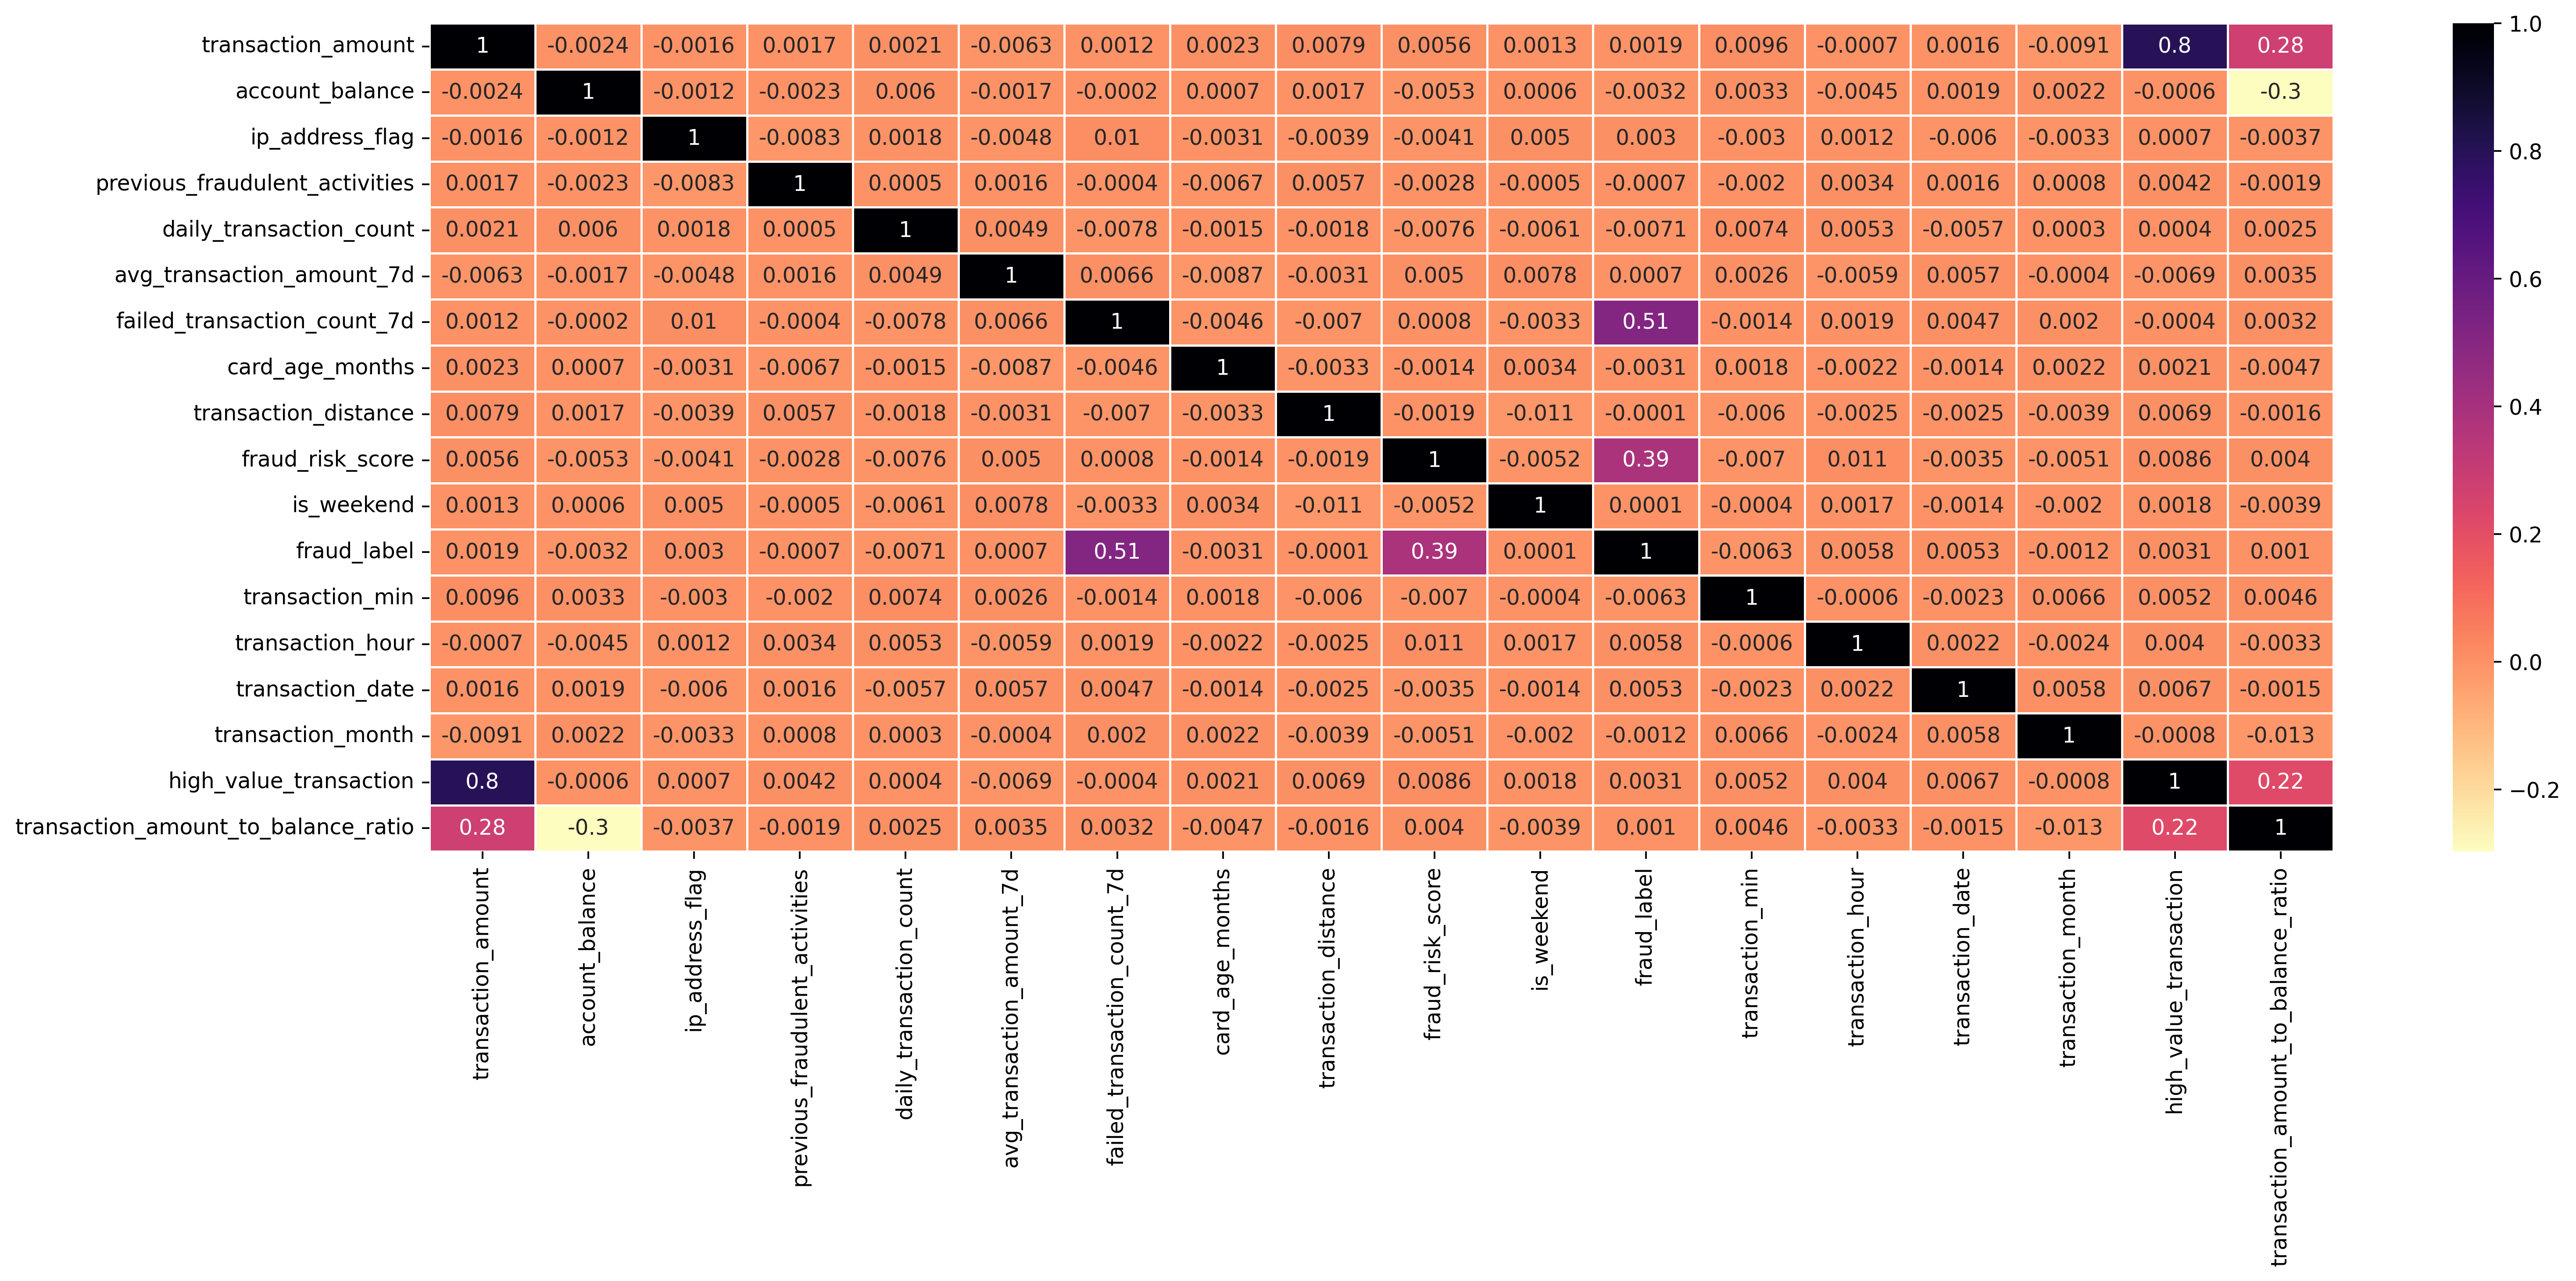

In [84]:
# Setting plot size
plt.figure(figsize = (20, 7), dpi = 350)

# Checking the correlation of each column with the fraud status
sns.heatmap(np.round(df.corr(numeric_only=True), 4), annot=True, linecolor='white', linewidths=1, cmap="magma_r");

The heatmap shows the relationship between our features. The most important row/column here is the fraud_label; we see that the features that are most correlated to this are: failed_transaction_count and fraud_risk_score. There might be more information in the categorical values than shown here though.

<Axes: xlabel='failed_transaction_count_7d', ylabel='fraud_risk_score'>

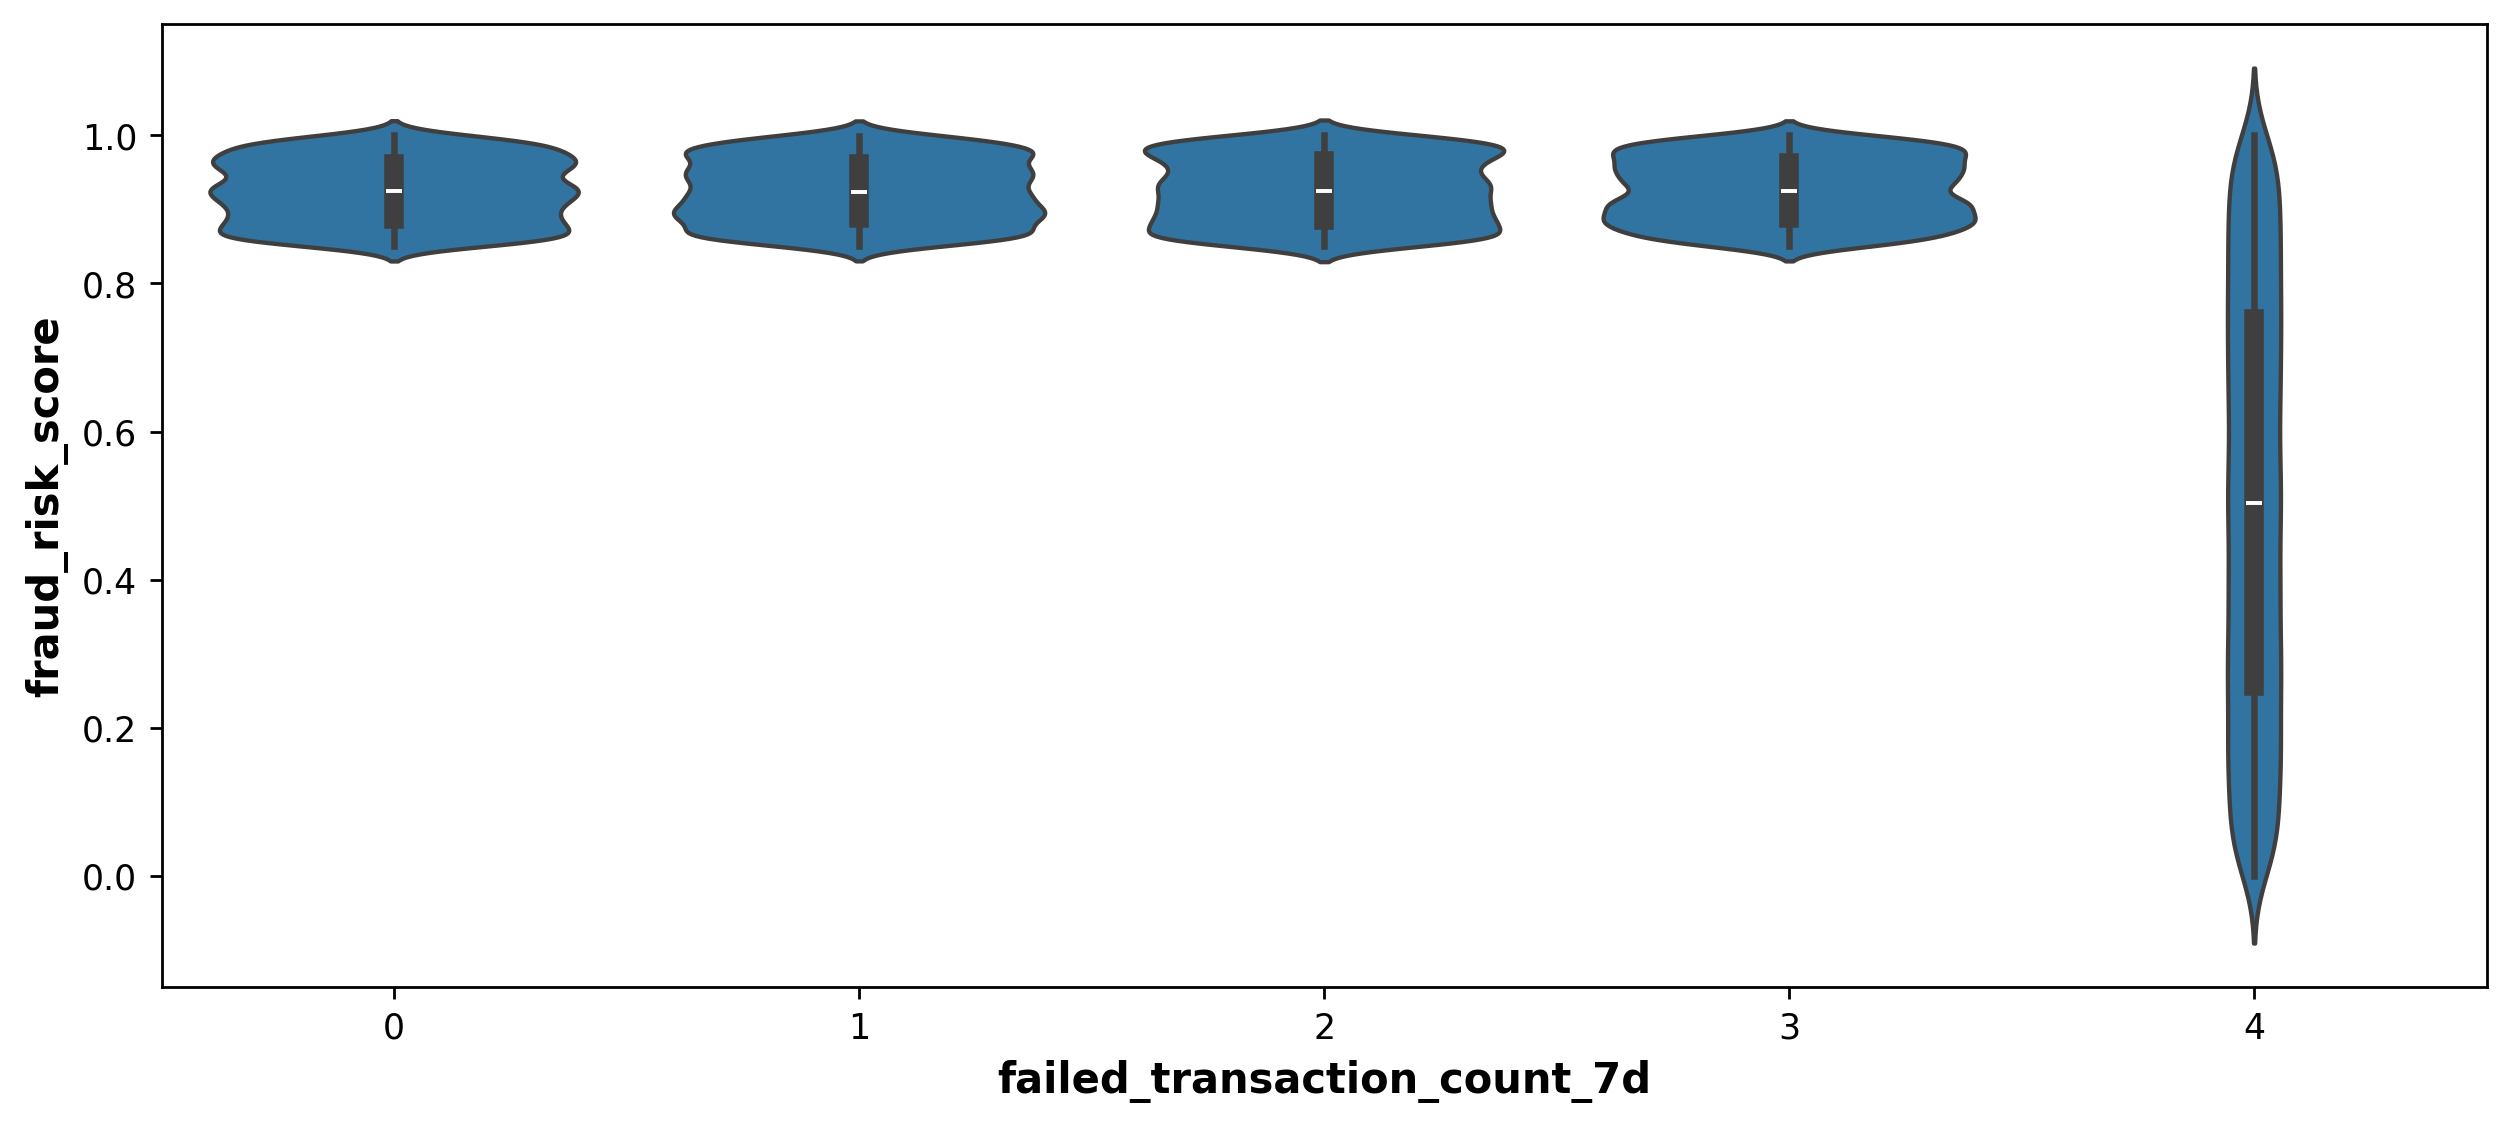

In [80]:
sns.violinplot(data=df[df['fraud_label']==1], x="failed_transaction_count_7d", y="fraud_risk_score")


<Axes: xlabel='failed_transaction_count_7d', ylabel='fraud_risk_score'>

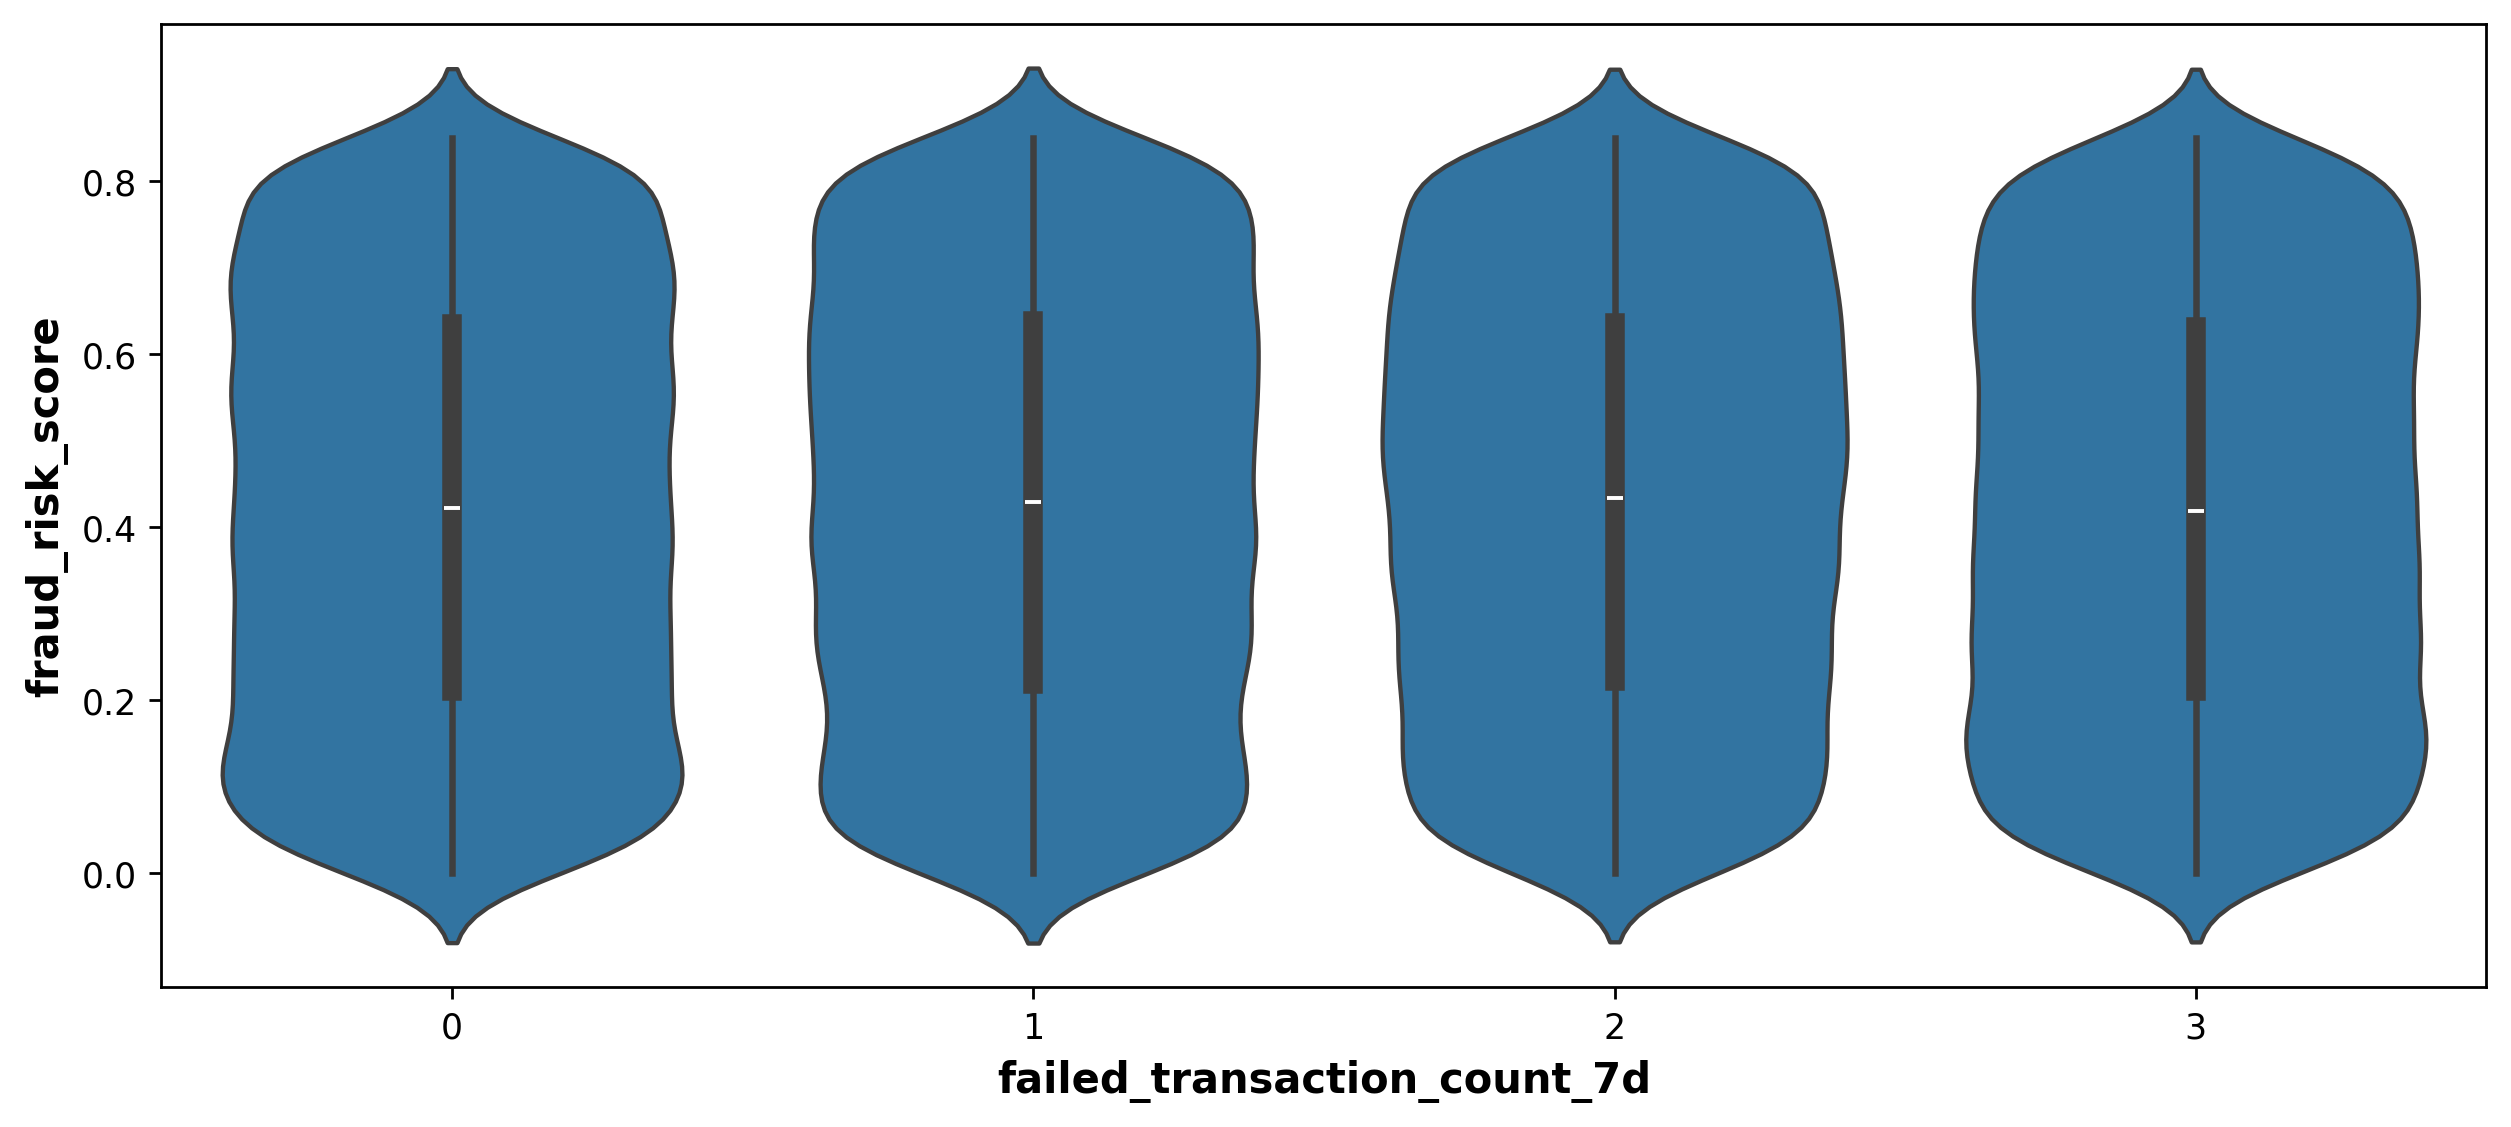

In [81]:
sns.violinplot(data=df[df['fraud_label']==0], x="failed_transaction_count_7d", y="fraud_risk_score")